# Multimodal search module

This notebooks shows how to carry out an image multimodal search with the [LAVIS](https://github.com/salesforce/LAVIS) library. 

The first cell is only run on google colab and installs the [ammico](https://github.com/ssciwr/AMMICO) package.

After that, we can import `ammico` and read in the files given a folder path.

In [1]:
# if running on google colab
# flake8-noqa-cell
import os

if "google.colab" in str(get_ipython()):
    # update python version
    # install setuptools
    # %pip install setuptools==61 -qqq
    # install ammico
    %pip install git+https://github.com/ssciwr/ammico.git -qqq
    # mount google drive for data and API key
    from google.colab import drive

    drive.mount("/content/drive")

In [2]:
# if there is not enough space on your hard drive, clear the cache folder
# this cell will delete all your cache!
!rm -rf ~/.cache
!mkdir ~/.cache

In [3]:
import ammico.utils as mutils
import ammico.multimodal_search as ms

In [4]:
mydict = mutils.find_files(
    path="data/",
    limit=10,
)

In [5]:
mydict

{'102141_2_eng': {'filename': 'data/102141_2_eng.png'},
 '106349S_por': {'filename': 'data/106349S_por.png'},
 '102730_eng': {'filename': 'data/102730_eng.png'}}

## Indexing and extracting features from images in selected folder

First you need to select a model. You can choose one of the following models: 
- [blip](https://github.com/salesforce/BLIP)
- [blip2](https://huggingface.co/docs/transformers/main/model_doc/blip-2) 
- [albef](https://github.com/salesforce/ALBEF) 
- [clip_base](https://github.com/openai/CLIP/blob/main/model-card.md)
- [clip_vitl14](https://github.com/mlfoundations/open_clip) 
- [clip_vitl14_336](https://github.com/mlfoundations/open_clip)

In [6]:
model_type = "blip"
# model_type = "blip2"
# model_type = "albef"
# model_type = "clip_base"
# model_type = "clip_vitl14"
# model_type = "clip_vitl14_336"

To process the loaded images using the selected model, use the below code:

In [7]:
my_obj = ms.MultimodalSearch(mydict)

In [8]:
my_obj.subdict

{'102141_2_eng': {'filename': 'data/102141_2_eng.png'},
 '106349S_por': {'filename': 'data/106349S_por.png'},
 '102730_eng': {'filename': 'data/102730_eng.png'}}

In [9]:
(
    model,
    vis_processors,
    txt_processors,
    image_keys,
    image_names,
    features_image_stacked,
) = my_obj.parsing_images(
    model_type, 
    path_to_save_tensors="data/",
    )

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 28.8MB/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

tokenizer_config.json: 100%|██████████| 28.0/28.0 [00:00<00:00, 16.6kB/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json: 100%|██████████| 570/570 [00:00<00:00, 808kB/s]

  0%|          | 0.00/1.97G [00:00<?, ?B/s]

  0%|          | 640k/1.97G [00:00<05:29, 6.42MB/s]

  0%|          | 3.35M/1.97G [00:00<01:49, 19.3MB/s]

  0%|          | 6.30M/1.97G [00:00<01:26, 24.5MB/s]

  0%|          | 8.64M/1.97G [00:00<01:53, 18.6MB/s]

  1%|          | 10.9M/1.97G [00:00<01:44, 20.2MB/s]

  1%|          | 13.0M/1.97G [00:00<01:55, 18.1MB/s]

  1%|          | 15.3M/1.97G [00:00<01:45, 19.8MB/s]

  1%|          | 17.9M/1.97G [00:00<01:36, 21.7MB/s]

  1%|          | 20.1M/1.97G [00:01<01:35, 22.0MB/s]

  1%|          | 22.6M/1.97G [00:01<01:31, 22.9MB/s]

  1%|▏         | 25.3M/1.97G [00:01<01:26, 24.1MB/s]

  1%|▏         | 27.6M/1.97G [00:01<01:33, 22.3MB/s]

  1%|▏         | 29.9M/1.97G [00:01<01:31, 22.8MB/s]

  2%|▏         | 32.5M/1.97G [00:01<01:28, 23.7MB/s]

  2%|▏         | 34.8M/1.97G [00:01<01:36, 21.6MB/s]

  2%|▏         | 36.9M/1.97G [00:01<01:37, 21.3MB/s]

  2%|▏         | 38.9M/1.97G [00:02<02:12, 15.6MB/s]

  2%|▏         | 41.9M/1.97G [00:02<01:48, 19.0MB/s]

  2%|▏         | 44.0M/1.97G [00:02<01:47, 19.3MB/s]

  2%|▏         | 46.0M/1.97G [00:02<02:22, 14.5MB/s]

  2%|▏         | 48.6M/1.97G [00:02<02:02, 16.9MB/s]

  3%|▎         | 50.5M/1.97G [00:02<02:06, 16.3MB/s]

  3%|▎         | 52.6M/1.97G [00:02<01:57, 17.5MB/s]

  3%|▎         | 56.3M/1.97G [00:02<01:29, 23.0MB/s]

  3%|▎         | 58.8M/1.97G [00:03<01:34, 21.7MB/s]

  3%|▎         | 62.6M/1.97G [00:03<01:17, 26.3MB/s]

  3%|▎         | 65.4M/1.97G [00:03<01:16, 26.9MB/s]

  3%|▎         | 68.1M/1.97G [00:03<01:38, 20.7MB/s]

  4%|▎         | 72.7M/1.97G [00:03<01:16, 26.8MB/s]

  4%|▎         | 75.6M/1.97G [00:03<01:22, 24.5MB/s]

  4%|▍         | 78.9M/1.97G [00:03<01:15, 26.9MB/s]

  4%|▍         | 81.7M/1.97G [00:04<01:24, 24.1MB/s]

  4%|▍         | 84.9M/1.97G [00:04<01:17, 26.3MB/s]

  4%|▍         | 87.7M/1.97G [00:04<01:16, 26.5MB/s]

  4%|▍         | 90.5M/1.97G [00:04<01:13, 27.4MB/s]

  5%|▍         | 93.2M/1.97G [00:04<01:12, 27.7MB/s]

  5%|▍         | 96.0M/1.97G [00:04<01:19, 25.2MB/s]

  5%|▍         | 98.5M/1.97G [00:04<01:40, 20.1MB/s]

  5%|▌         | 101M/1.97G [00:04<01:30, 22.3MB/s] 

  5%|▌         | 104M/1.97G [00:04<01:22, 24.3MB/s]

  5%|▌         | 108M/1.97G [00:05<01:12, 27.7MB/s]

  6%|▌         | 111M/1.97G [00:05<01:09, 28.6MB/s]

  6%|▌         | 114M/1.97G [00:05<01:27, 22.7MB/s]

  6%|▌         | 116M/1.97G [00:05<01:24, 23.5MB/s]

  6%|▌         | 121M/1.97G [00:05<01:06, 29.7MB/s]

  6%|▌         | 124M/1.97G [00:05<01:19, 24.9MB/s]

  6%|▋         | 127M/1.97G [00:05<01:26, 22.9MB/s]

  6%|▋         | 129M/1.97G [00:06<01:34, 20.9MB/s]

  7%|▋         | 133M/1.97G [00:06<01:21, 24.1MB/s]

  7%|▋         | 135M/1.97G [00:06<01:19, 24.7MB/s]

  7%|▋         | 138M/1.97G [00:06<01:20, 24.6MB/s]

  7%|▋         | 140M/1.97G [00:06<01:18, 25.1MB/s]

  7%|▋         | 143M/1.97G [00:06<01:24, 23.4MB/s]

  7%|▋         | 147M/1.97G [00:06<01:08, 28.6MB/s]

  7%|▋         | 150M/1.97G [00:06<01:26, 22.5MB/s]

  8%|▊         | 152M/1.97G [00:07<01:25, 22.8MB/s]

  8%|▊         | 155M/1.97G [00:07<01:24, 23.2MB/s]

  8%|▊         | 157M/1.97G [00:07<01:26, 22.5MB/s]

  8%|▊         | 159M/1.97G [00:07<01:27, 22.2MB/s]

  8%|▊         | 162M/1.97G [00:07<01:20, 24.1MB/s]

  8%|▊         | 164M/1.97G [00:07<01:23, 23.3MB/s]

  8%|▊         | 167M/1.97G [00:07<01:28, 21.9MB/s]

  8%|▊         | 169M/1.97G [00:07<01:40, 19.2MB/s]

  9%|▊         | 173M/1.97G [00:07<01:16, 25.2MB/s]

  9%|▊         | 175M/1.97G [00:08<01:32, 20.9MB/s]

  9%|▉         | 178M/1.97G [00:08<01:29, 21.6MB/s]

  9%|▉         | 181M/1.97G [00:08<01:17, 24.7MB/s]

  9%|▉         | 186M/1.97G [00:08<01:01, 31.0MB/s]

  9%|▉         | 189M/1.97G [00:08<01:01, 31.4MB/s]

 10%|▉         | 192M/1.97G [00:08<01:16, 25.1MB/s]

 10%|▉         | 195M/1.97G [00:08<01:12, 26.5MB/s]

 10%|▉         | 199M/1.97G [00:08<01:03, 30.1MB/s]

 10%|█         | 202M/1.97G [00:09<01:29, 21.3MB/s]

 10%|█         | 205M/1.97G [00:09<01:21, 23.2MB/s]

 10%|█         | 209M/1.97G [00:09<01:07, 28.2MB/s]

 11%|█         | 213M/1.97G [00:09<01:04, 29.3MB/s]

 11%|█         | 216M/1.97G [00:09<01:04, 29.4MB/s]

 11%|█         | 219M/1.97G [00:09<01:03, 29.5MB/s]

 11%|█         | 222M/1.97G [00:09<00:58, 32.0MB/s]

 11%|█         | 226M/1.97G [00:09<00:57, 32.5MB/s]

 11%|█▏        | 229M/1.97G [00:10<01:02, 30.1MB/s]

 11%|█▏        | 232M/1.97G [00:10<01:06, 28.2MB/s]

 12%|█▏        | 235M/1.97G [00:10<01:04, 28.9MB/s]

 12%|█▏        | 238M/1.97G [00:10<00:59, 31.2MB/s]

 12%|█▏        | 241M/1.97G [00:10<01:00, 30.6MB/s]

 12%|█▏        | 244M/1.97G [00:10<00:59, 31.4MB/s]

 12%|█▏        | 248M/1.97G [00:10<01:03, 29.3MB/s]

 12%|█▏        | 251M/1.97G [00:10<00:59, 31.0MB/s]

 13%|█▎        | 254M/1.97G [00:10<00:59, 31.0MB/s]

 13%|█▎        | 258M/1.97G [00:11<00:55, 33.4MB/s]

 13%|█▎        | 261M/1.97G [00:11<00:55, 33.1MB/s]

 13%|█▎        | 264M/1.97G [00:11<00:54, 33.5MB/s]

 13%|█▎        | 267M/1.97G [00:11<01:00, 30.2MB/s]

 13%|█▎        | 271M/1.97G [00:11<00:56, 32.3MB/s]

 14%|█▎        | 274M/1.97G [00:11<01:24, 21.6MB/s]

 14%|█▎        | 277M/1.97G [00:12<01:56, 15.7MB/s]

 14%|█▍        | 279M/1.97G [00:12<01:47, 16.9MB/s]

 14%|█▍        | 281M/1.97G [00:12<01:54, 15.9MB/s]

 14%|█▍        | 284M/1.97G [00:12<01:42, 17.7MB/s]

 14%|█▍        | 286M/1.97G [00:12<01:37, 18.6MB/s]

 14%|█▍        | 288M/1.97G [00:12<01:31, 19.7MB/s]

 14%|█▍        | 290M/1.97G [00:12<01:38, 18.4MB/s]

 14%|█▍        | 292M/1.97G [00:12<01:33, 19.4MB/s]

 15%|█▍        | 294M/1.97G [00:12<01:31, 19.7MB/s]

 15%|█▍        | 297M/1.97G [00:13<01:28, 20.4MB/s]

 15%|█▍        | 299M/1.97G [00:13<01:18, 23.0MB/s]

 15%|█▌        | 304M/1.97G [00:13<00:59, 30.1MB/s]

 15%|█▌        | 307M/1.97G [00:13<01:13, 24.4MB/s]

 15%|█▌        | 311M/1.97G [00:13<01:03, 28.1MB/s]

 16%|█▌        | 314M/1.97G [00:13<01:16, 23.5MB/s]

 16%|█▌        | 316M/1.97G [00:14<02:05, 14.2MB/s]

 16%|█▌        | 318M/1.97G [00:14<03:24, 8.73MB/s]

 16%|█▌        | 320M/1.97G [00:14<03:01, 9.82MB/s]

 16%|█▌        | 321M/1.97G [00:15<03:01, 9.79MB/s]

 16%|█▌        | 323M/1.97G [00:15<02:53, 10.2MB/s]

 16%|█▌        | 324M/1.97G [00:15<03:05, 9.58MB/s]

 16%|█▌        | 326M/1.97G [00:15<02:42, 10.9MB/s]

 16%|█▌        | 328M/1.97G [00:15<02:21, 12.6MB/s]

 16%|█▋        | 329M/1.97G [00:15<02:08, 13.8MB/s]

 16%|█▋        | 332M/1.97G [00:15<01:51, 15.9MB/s]

 17%|█▋        | 334M/1.97G [00:15<01:36, 18.3MB/s]

 17%|█▋        | 336M/1.97G [00:15<01:45, 16.7MB/s]

 17%|█▋        | 338M/1.97G [00:16<02:07, 13.8MB/s]

 17%|█▋        | 340M/1.97G [00:16<01:46, 16.5MB/s]

 17%|█▋        | 342M/1.97G [00:16<02:19, 12.6MB/s]

 17%|█▋        | 344M/1.97G [00:16<02:04, 14.0MB/s]

 17%|█▋        | 345M/1.97G [00:16<01:58, 14.7MB/s]

 17%|█▋        | 348M/1.97G [00:16<01:34, 18.6MB/s]

 17%|█▋        | 351M/1.97G [00:16<01:28, 19.9MB/s]

 18%|█▊        | 354M/1.97G [00:16<01:11, 24.6MB/s]

 18%|█▊        | 357M/1.97G [00:17<01:23, 20.9MB/s]

 18%|█▊        | 360M/1.97G [00:17<01:10, 24.6MB/s]

 18%|█▊        | 363M/1.97G [00:17<01:23, 20.9MB/s]

 18%|█▊        | 365M/1.97G [00:17<01:27, 19.8MB/s]

 18%|█▊        | 368M/1.97G [00:17<01:13, 23.5MB/s]

 18%|█▊        | 371M/1.97G [00:17<01:09, 24.9MB/s]

 19%|█▊        | 374M/1.97G [00:18<01:43, 16.7MB/s]

 19%|█▊        | 376M/1.97G [00:18<01:39, 17.3MB/s]

 19%|█▊        | 378M/1.97G [00:18<01:52, 15.3MB/s]

 19%|█▉        | 379M/1.97G [00:18<01:50, 15.5MB/s]

 19%|█▉        | 381M/1.97G [00:18<01:46, 16.1MB/s]

 19%|█▉        | 384M/1.97G [00:18<01:25, 19.9MB/s]

 19%|█▉        | 386M/1.97G [00:18<01:23, 20.5MB/s]

 19%|█▉        | 389M/1.97G [00:18<01:15, 22.6MB/s]

 19%|█▉        | 392M/1.97G [00:18<01:12, 23.6MB/s]

 20%|█▉        | 394M/1.97G [00:19<01:10, 24.3MB/s]

 20%|█▉        | 397M/1.97G [00:19<01:07, 25.3MB/s]

 20%|█▉        | 400M/1.97G [00:19<01:02, 27.0MB/s]

 20%|█▉        | 403M/1.97G [00:19<01:01, 27.5MB/s]

 20%|██        | 405M/1.97G [00:19<01:13, 23.0MB/s]

 20%|██        | 408M/1.97G [00:19<01:20, 21.1MB/s]

 20%|██        | 410M/1.97G [00:19<01:15, 22.4MB/s]

 20%|██        | 413M/1.97G [00:19<01:21, 20.6MB/s]

 21%|██        | 417M/1.97G [00:20<01:03, 26.3MB/s]

 21%|██        | 419M/1.97G [00:20<01:09, 24.0MB/s]

 21%|██        | 422M/1.97G [00:20<01:15, 22.0MB/s]

 21%|██        | 425M/1.97G [00:20<01:04, 25.9MB/s]

 21%|██        | 429M/1.97G [00:20<01:00, 27.4MB/s]

 21%|██▏       | 431M/1.97G [00:20<00:59, 28.0MB/s]

 22%|██▏       | 435M/1.97G [00:20<00:54, 30.5MB/s]

 22%|██▏       | 438M/1.97G [00:20<00:55, 29.9MB/s]

 22%|██▏       | 441M/1.97G [00:20<00:59, 28.0MB/s]

 22%|██▏       | 444M/1.97G [00:21<01:21, 20.3MB/s]

 22%|██▏       | 446M/1.97G [00:21<01:21, 20.2MB/s]

 22%|██▏       | 449M/1.97G [00:21<01:11, 23.0MB/s]

 22%|██▏       | 453M/1.97G [00:21<00:58, 28.0MB/s]

 23%|██▎       | 456M/1.97G [00:21<01:01, 26.5MB/s]

 23%|██▎       | 460M/1.97G [00:21<00:56, 29.0MB/s]

 23%|██▎       | 463M/1.97G [00:21<01:01, 26.6MB/s]

 23%|██▎       | 466M/1.97G [00:22<00:54, 29.7MB/s]

 23%|██▎       | 469M/1.97G [00:22<00:56, 28.8MB/s]

 23%|██▎       | 472M/1.97G [00:22<00:57, 28.1MB/s]

 24%|██▎       | 477M/1.97G [00:22<00:48, 33.3MB/s]

 24%|██▍       | 480M/1.97G [00:22<00:52, 30.7MB/s]

 24%|██▍       | 485M/1.97G [00:22<00:46, 34.9MB/s]

 24%|██▍       | 488M/1.97G [00:22<00:48, 33.2MB/s]

 24%|██▍       | 492M/1.97G [00:22<00:43, 36.5MB/s]

 25%|██▍       | 496M/1.97G [00:22<00:48, 32.6MB/s]

 25%|██▍       | 500M/1.97G [00:23<00:43, 36.2MB/s]

 25%|██▍       | 504M/1.97G [00:23<00:50, 31.2MB/s]

 25%|██▌       | 507M/1.97G [00:23<00:49, 31.7MB/s]

 25%|██▌       | 510M/1.97G [00:23<01:10, 22.4MB/s]

 25%|██▌       | 514M/1.97G [00:23<01:02, 25.2MB/s]

 26%|██▌       | 517M/1.97G [00:23<01:00, 26.0MB/s]

 26%|██▌       | 521M/1.97G [00:23<00:51, 30.5MB/s]

 26%|██▌       | 524M/1.97G [00:24<00:55, 28.3MB/s]

 26%|██▌       | 527M/1.97G [00:24<00:54, 28.8MB/s]

 26%|██▋       | 530M/1.97G [00:24<00:53, 29.0MB/s]

 26%|██▋       | 533M/1.97G [00:24<00:55, 28.2MB/s]

 27%|██▋       | 536M/1.97G [00:24<00:50, 30.5MB/s]

 27%|██▋       | 540M/1.97G [00:24<01:01, 25.0MB/s]

 27%|██▋       | 543M/1.97G [00:24<00:53, 28.7MB/s]

 27%|██▋       | 546M/1.97G [00:24<00:56, 27.2MB/s]

 27%|██▋       | 549M/1.97G [00:25<01:00, 25.6MB/s]

 27%|██▋       | 553M/1.97G [00:25<00:50, 30.6MB/s]

 28%|██▊       | 557M/1.97G [00:25<00:51, 29.8MB/s]

 28%|██▊       | 561M/1.97G [00:25<00:43, 35.2MB/s]

 28%|██▊       | 565M/1.97G [00:25<00:46, 32.5MB/s]

 28%|██▊       | 568M/1.97G [00:25<00:52, 29.1MB/s]

 28%|██▊       | 571M/1.97G [00:25<00:58, 25.9MB/s]

 28%|██▊       | 574M/1.97G [00:25<00:56, 26.9MB/s]

 29%|██▊       | 577M/1.97G [00:25<00:56, 26.8MB/s]

 29%|██▊       | 579M/1.97G [00:26<00:55, 27.1MB/s]

 29%|██▉       | 582M/1.97G [00:26<00:54, 27.7MB/s]

 29%|██▉       | 585M/1.97G [00:26<00:53, 28.3MB/s]

 29%|██▉       | 589M/1.97G [00:26<00:49, 30.0MB/s]

 29%|██▉       | 592M/1.97G [00:26<00:49, 30.0MB/s]

 29%|██▉       | 594M/1.97G [00:26<00:54, 27.4MB/s]

 30%|██▉       | 598M/1.97G [00:26<00:51, 29.2MB/s]

 30%|██▉       | 601M/1.97G [00:26<00:50, 29.5MB/s]

 30%|██▉       | 603M/1.97G [00:27<01:05, 22.8MB/s]

 30%|███       | 606M/1.97G [00:27<01:01, 24.2MB/s]

 30%|███       | 609M/1.97G [00:27<00:58, 25.4MB/s]

 30%|███       | 613M/1.97G [00:27<00:49, 29.9MB/s]

 31%|███       | 616M/1.97G [00:27<01:12, 20.3MB/s]

 31%|███       | 619M/1.97G [00:27<01:06, 22.0MB/s]

 31%|███       | 622M/1.97G [00:27<01:06, 21.9MB/s]

 31%|███       | 624M/1.97G [00:27<01:03, 22.9MB/s]

 31%|███       | 628M/1.97G [00:28<00:54, 27.0MB/s]

 31%|███▏      | 631M/1.97G [00:28<01:01, 23.8MB/s]

 31%|███▏      | 633M/1.97G [00:28<01:02, 23.2MB/s]

 32%|███▏      | 636M/1.97G [00:28<00:56, 25.6MB/s]

 32%|███▏      | 639M/1.97G [00:28<00:58, 24.6MB/s]

 32%|███▏      | 641M/1.97G [00:28<00:59, 24.3MB/s]

 32%|███▏      | 645M/1.97G [00:28<00:50, 28.7MB/s]

 32%|███▏      | 648M/1.97G [00:29<01:28, 16.3MB/s]

 32%|███▏      | 650M/1.97G [00:29<01:34, 15.2MB/s]

 32%|███▏      | 652M/1.97G [00:29<02:00, 11.9MB/s]

 32%|███▏      | 655M/1.97G [00:29<01:33, 15.3MB/s]

 33%|███▎      | 657M/1.97G [00:30<01:56, 12.2MB/s]

 33%|███▎      | 660M/1.97G [00:30<01:36, 14.8MB/s]

 33%|███▎      | 662M/1.97G [00:30<01:30, 15.8MB/s]

 33%|███▎      | 666M/1.97G [00:30<01:09, 20.3MB/s]

 33%|███▎      | 668M/1.97G [00:30<01:03, 22.4MB/s]

 33%|███▎      | 671M/1.97G [00:30<01:00, 23.4MB/s]

 33%|███▎      | 674M/1.97G [00:30<00:55, 25.2MB/s]

 34%|███▎      | 677M/1.97G [00:30<01:07, 20.9MB/s]

 34%|███▎      | 679M/1.97G [00:30<01:04, 21.9MB/s]

 34%|███▍      | 682M/1.97G [00:31<00:58, 23.9MB/s]

 34%|███▍      | 684M/1.97G [00:31<00:59, 23.5MB/s]

 34%|███▍      | 689M/1.97G [00:31<00:49, 28.4MB/s]

 34%|███▍      | 691M/1.97G [00:31<00:50, 27.5MB/s]

 34%|███▍      | 694M/1.97G [00:31<00:53, 25.8MB/s]

 35%|███▍      | 697M/1.97G [00:31<00:55, 24.8MB/s]

 35%|███▍      | 699M/1.97G [00:31<00:59, 23.1MB/s]

 35%|███▍      | 701M/1.97G [00:31<01:02, 21.9MB/s]

 35%|███▍      | 703M/1.97G [00:31<01:04, 21.4MB/s]

 35%|███▍      | 706M/1.97G [00:32<00:59, 23.2MB/s]

 35%|███▌      | 708M/1.97G [00:32<01:17, 17.7MB/s]

 35%|███▌      | 711M/1.97G [00:32<01:09, 19.6MB/s]

 35%|███▌      | 714M/1.97G [00:32<01:03, 21.6MB/s]

 36%|███▌      | 717M/1.97G [00:32<00:57, 23.7MB/s]

 36%|███▌      | 720M/1.97G [00:32<00:52, 25.7MB/s]

 36%|███▌      | 723M/1.97G [00:32<00:49, 27.6MB/s]

 36%|███▌      | 726M/1.97G [00:32<00:50, 27.1MB/s]

 36%|███▌      | 729M/1.97G [00:33<01:03, 21.2MB/s]

 36%|███▋      | 733M/1.97G [00:33<00:53, 25.1MB/s]

 36%|███▋      | 735M/1.97G [00:33<01:06, 20.3MB/s]

 37%|███▋      | 738M/1.97G [00:33<01:01, 21.7MB/s]

 37%|███▋      | 741M/1.97G [00:33<00:56, 23.6MB/s]

 37%|███▋      | 743M/1.97G [00:33<00:52, 25.3MB/s]

 37%|███▋      | 747M/1.97G [00:33<00:46, 28.7MB/s]

 37%|███▋      | 750M/1.97G [00:34<01:02, 21.2MB/s]

 37%|███▋      | 754M/1.97G [00:34<00:53, 24.6MB/s]

 38%|███▊      | 758M/1.97G [00:34<00:45, 28.8MB/s]

 38%|███▊      | 761M/1.97G [00:34<00:46, 28.1MB/s]

 38%|███▊      | 764M/1.97G [00:34<00:46, 28.2MB/s]

 38%|███▊      | 767M/1.97G [00:34<00:50, 26.0MB/s]

 38%|███▊      | 771M/1.97G [00:34<00:45, 28.6MB/s]

 38%|███▊      | 774M/1.97G [00:34<00:47, 27.7MB/s]

 38%|███▊      | 776M/1.97G [00:35<00:49, 26.4MB/s]

 39%|███▊      | 781M/1.97G [00:35<00:38, 33.5MB/s]

 39%|███▉      | 785M/1.97G [00:35<00:43, 30.1MB/s]

 39%|███▉      | 788M/1.97G [00:35<00:42, 30.3MB/s]

 39%|███▉      | 791M/1.97G [00:35<00:46, 27.8MB/s]

 39%|███▉      | 794M/1.97G [00:35<00:43, 29.5MB/s]

 40%|███▉      | 797M/1.97G [00:35<01:08, 18.6MB/s]

 40%|███▉      | 804M/1.97G [00:36<00:45, 28.1MB/s]

 40%|████      | 807M/1.97G [00:36<00:47, 26.9MB/s]

 40%|████      | 810M/1.97G [00:36<00:46, 27.0MB/s]

 40%|████      | 813M/1.97G [00:36<00:46, 27.0MB/s]

 40%|████      | 816M/1.97G [00:36<00:51, 24.7MB/s]

 41%|████      | 819M/1.97G [00:37<01:26, 14.6MB/s]

 41%|████      | 821M/1.97G [00:37<01:36, 13.0MB/s]

 41%|████      | 823M/1.97G [00:37<01:23, 15.0MB/s]

 41%|████      | 826M/1.97G [00:37<01:15, 16.6MB/s]

 41%|████      | 828M/1.97G [00:37<01:16, 16.3MB/s]

 41%|████      | 829M/1.97G [00:37<01:12, 17.1MB/s]

 41%|████      | 832M/1.97G [00:37<01:02, 20.0MB/s]

 41%|████▏     | 835M/1.97G [00:37<00:57, 21.7MB/s]

 41%|████▏     | 837M/1.97G [00:38<01:02, 20.0MB/s]

 42%|████▏     | 841M/1.97G [00:38<00:52, 23.6MB/s]

 42%|████▏     | 844M/1.97G [00:38<00:46, 26.4MB/s]

 42%|████▏     | 847M/1.97G [00:38<00:46, 26.3MB/s]

 42%|████▏     | 851M/1.97G [00:38<00:39, 30.7MB/s]

 42%|████▏     | 854M/1.97G [00:38<00:46, 26.2MB/s]

 42%|████▏     | 856M/1.97G [00:38<00:53, 22.7MB/s]

 43%|████▎     | 859M/1.97G [00:38<00:52, 23.1MB/s]

 43%|████▎     | 861M/1.97G [00:39<01:07, 18.1MB/s]

 43%|████▎     | 863M/1.97G [00:39<01:07, 18.0MB/s]

 43%|████▎     | 865M/1.97G [00:39<01:04, 18.6MB/s]

 43%|████▎     | 868M/1.97G [00:39<00:56, 21.4MB/s]

 43%|████▎     | 871M/1.97G [00:39<00:47, 25.4MB/s]

 43%|████▎     | 875M/1.97G [00:39<00:41, 28.9MB/s]

 44%|████▎     | 878M/1.97G [00:39<00:40, 29.2MB/s]

 44%|████▎     | 881M/1.97G [00:40<01:10, 16.8MB/s]

 44%|████▍     | 883M/1.97G [00:40<01:08, 17.4MB/s]

 44%|████▍     | 885M/1.97G [00:40<01:05, 18.1MB/s]

 44%|████▍     | 887M/1.97G [00:40<01:03, 18.6MB/s]

 44%|████▍     | 889M/1.97G [00:40<01:11, 16.4MB/s]

 44%|████▍     | 892M/1.97G [00:40<01:01, 19.1MB/s]

 44%|████▍     | 894M/1.97G [00:40<01:01, 19.3MB/s]

 44%|████▍     | 896M/1.97G [00:40<01:01, 19.2MB/s]

 45%|████▍     | 899M/1.97G [00:41<00:51, 22.6MB/s]

 45%|████▍     | 902M/1.97G [00:41<00:55, 21.3MB/s]

 45%|████▍     | 904M/1.97G [00:41<00:52, 22.1MB/s]

 45%|████▍     | 907M/1.97G [00:41<00:47, 24.5MB/s]

 45%|████▌     | 910M/1.97G [00:41<00:42, 27.0MB/s]

 45%|████▌     | 913M/1.97G [00:41<00:41, 27.9MB/s]

 45%|████▌     | 916M/1.97G [00:41<00:44, 26.0MB/s]

 46%|████▌     | 920M/1.97G [00:41<00:36, 31.8MB/s]

 46%|████▌     | 924M/1.97G [00:42<00:46, 24.7MB/s]

 46%|████▌     | 926M/1.97G [00:42<00:45, 25.1MB/s]

 46%|████▌     | 929M/1.97G [00:42<00:44, 25.7MB/s]

 46%|████▌     | 932M/1.97G [00:42<00:46, 24.3MB/s]

 46%|████▋     | 934M/1.97G [00:42<00:46, 24.4MB/s]

 46%|████▋     | 937M/1.97G [00:42<00:43, 26.0MB/s]

 47%|████▋     | 940M/1.97G [00:42<00:59, 19.1MB/s]

 47%|████▋     | 942M/1.97G [00:42<00:54, 20.9MB/s]

 47%|████▋     | 945M/1.97G [00:43<00:54, 20.7MB/s]

 47%|████▋     | 947M/1.97G [00:43<00:58, 19.1MB/s]

 47%|████▋     | 949M/1.97G [00:43<00:53, 20.9MB/s]

 47%|████▋     | 951M/1.97G [00:43<01:03, 17.7MB/s]

 47%|████▋     | 953M/1.97G [00:43<01:05, 17.1MB/s]

 47%|████▋     | 955M/1.97G [00:43<01:08, 16.2MB/s]

 47%|████▋     | 957M/1.97G [00:43<01:35, 11.7MB/s]

 48%|████▊     | 959M/1.97G [00:44<01:23, 13.3MB/s]

 48%|████▊     | 960M/1.97G [00:44<01:20, 13.8MB/s]

 48%|████▊     | 963M/1.97G [00:44<01:00, 18.2MB/s]

 48%|████▊     | 965M/1.97G [00:44<01:08, 16.1MB/s]

 48%|████▊     | 967M/1.97G [00:44<01:19, 13.8MB/s]

 48%|████▊     | 968M/1.97G [00:44<01:25, 12.9MB/s]

 48%|████▊     | 970M/1.97G [00:44<01:43, 10.6MB/s]

 48%|████▊     | 972M/1.97G [00:45<01:27, 12.6MB/s]

 48%|████▊     | 973M/1.97G [00:45<01:21, 13.4MB/s]

 48%|████▊     | 976M/1.97G [00:45<01:09, 15.8MB/s]

 48%|████▊     | 977M/1.97G [00:45<01:18, 13.8MB/s]

 49%|████▊     | 979M/1.97G [00:45<01:16, 14.3MB/s]

 49%|████▊     | 981M/1.97G [00:45<01:11, 15.3MB/s]

 49%|████▊     | 983M/1.97G [00:45<00:59, 18.3MB/s]

 49%|████▉     | 986M/1.97G [00:45<00:54, 19.8MB/s]

 49%|████▉     | 988M/1.97G [00:45<00:54, 20.0MB/s]

 49%|████▉     | 990M/1.97G [00:46<00:49, 21.6MB/s]

 49%|████▉     | 993M/1.97G [00:46<00:47, 22.6MB/s]

 49%|████▉     | 995M/1.97G [00:46<01:05, 16.5MB/s]

 49%|████▉     | 999M/1.97G [00:46<00:49, 21.6MB/s]

 50%|████▉     | 0.98G/1.97G [00:46<00:37, 28.5MB/s]

 50%|████▉     | 0.98G/1.97G [00:46<00:38, 27.6MB/s]

 50%|█████     | 0.99G/1.97G [00:46<00:33, 31.8MB/s]

 50%|█████     | 0.99G/1.97G [00:47<00:39, 26.5MB/s]

 50%|█████     | 0.99G/1.97G [00:47<00:35, 29.9MB/s]

 51%|█████     | 1.00G/1.97G [00:47<00:38, 27.3MB/s]

 51%|█████     | 1.00G/1.97G [00:47<00:37, 27.6MB/s]

 51%|█████     | 1.00G/1.97G [00:47<00:36, 28.3MB/s]

 51%|█████     | 1.01G/1.97G [00:47<00:43, 23.9MB/s]

 51%|█████     | 1.01G/1.97G [00:47<00:38, 26.5MB/s]

 51%|█████▏    | 1.01G/1.97G [00:47<00:33, 30.3MB/s]

 52%|█████▏    | 1.02G/1.97G [00:47<00:34, 29.8MB/s]

 52%|█████▏    | 1.02G/1.97G [00:48<00:44, 23.1MB/s]

 52%|█████▏    | 1.02G/1.97G [00:48<00:41, 24.5MB/s]

 52%|█████▏    | 1.02G/1.97G [00:48<00:46, 21.9MB/s]

 52%|█████▏    | 1.03G/1.97G [00:48<00:50, 20.1MB/s]

 52%|█████▏    | 1.03G/1.97G [00:48<00:41, 24.3MB/s]

 52%|█████▏    | 1.03G/1.97G [00:48<00:43, 23.1MB/s]

 53%|█████▎    | 1.03G/1.97G [00:48<00:42, 23.4MB/s]

 53%|█████▎    | 1.04G/1.97G [00:49<00:41, 24.1MB/s]

 53%|█████▎    | 1.04G/1.97G [00:49<00:38, 25.7MB/s]

 53%|█████▎    | 1.04G/1.97G [00:49<00:38, 26.2MB/s]

 53%|█████▎    | 1.05G/1.97G [00:49<00:36, 26.9MB/s]

 53%|█████▎    | 1.05G/1.97G [00:49<00:57, 17.1MB/s]

 53%|█████▎    | 1.05G/1.97G [00:49<00:50, 19.7MB/s]

 53%|█████▎    | 1.05G/1.97G [00:49<00:50, 19.6MB/s]

 54%|█████▎    | 1.06G/1.97G [00:49<00:40, 24.4MB/s]

 54%|█████▎    | 1.06G/1.97G [00:50<00:41, 23.5MB/s]

 54%|█████▍    | 1.06G/1.97G [00:50<00:37, 25.8MB/s]

 54%|█████▍    | 1.06G/1.97G [00:50<00:40, 23.8MB/s]

 54%|█████▍    | 1.07G/1.97G [00:50<00:38, 25.0MB/s]

 54%|█████▍    | 1.07G/1.97G [00:50<00:37, 25.7MB/s]

 54%|█████▍    | 1.07G/1.97G [00:50<00:36, 26.5MB/s]

 55%|█████▍    | 1.08G/1.97G [00:50<00:44, 21.7MB/s]

 55%|█████▍    | 1.08G/1.97G [00:50<00:49, 19.5MB/s]

 55%|█████▍    | 1.08G/1.97G [00:51<00:39, 24.3MB/s]

 55%|█████▍    | 1.08G/1.97G [00:51<00:39, 24.1MB/s]

 55%|█████▌    | 1.09G/1.97G [00:51<00:37, 25.5MB/s]

 55%|█████▌    | 1.09G/1.97G [00:51<00:35, 26.9MB/s]

 55%|█████▌    | 1.09G/1.97G [00:51<00:33, 28.1MB/s]

 56%|█████▌    | 1.10G/1.97G [00:51<00:35, 26.4MB/s]

 56%|█████▌    | 1.10G/1.97G [00:51<00:35, 26.5MB/s]

 56%|█████▌    | 1.10G/1.97G [00:51<00:37, 25.2MB/s]

 56%|█████▌    | 1.10G/1.97G [00:51<00:31, 29.6MB/s]

 56%|█████▌    | 1.11G/1.97G [00:52<00:33, 28.0MB/s]

 56%|█████▋    | 1.11G/1.97G [00:52<00:32, 28.7MB/s]

 56%|█████▋    | 1.11G/1.97G [00:52<00:31, 29.2MB/s]

 57%|█████▋    | 1.12G/1.97G [00:52<00:33, 27.5MB/s]

 57%|█████▋    | 1.12G/1.97G [00:52<00:43, 21.2MB/s]

 57%|█████▋    | 1.12G/1.97G [00:52<00:40, 22.5MB/s]

 57%|█████▋    | 1.12G/1.97G [00:52<00:46, 19.4MB/s]

 57%|█████▋    | 1.12G/1.97G [00:53<00:49, 18.4MB/s]

 57%|█████▋    | 1.13G/1.97G [00:53<00:39, 22.6MB/s]

 57%|█████▋    | 1.13G/1.97G [00:53<00:37, 24.3MB/s]

 58%|█████▊    | 1.13G/1.97G [00:53<00:35, 25.2MB/s]

 58%|█████▊    | 1.14G/1.97G [00:53<00:34, 25.6MB/s]

 58%|█████▊    | 1.14G/1.97G [00:53<00:39, 22.5MB/s]

 58%|█████▊    | 1.14G/1.97G [00:53<00:36, 24.3MB/s]

 58%|█████▊    | 1.14G/1.97G [00:53<00:34, 25.4MB/s]

 58%|█████▊    | 1.15G/1.97G [00:54<01:10, 12.5MB/s]

 58%|█████▊    | 1.15G/1.97G [00:54<01:10, 12.5MB/s]

 58%|█████▊    | 1.15G/1.97G [00:54<01:04, 13.7MB/s]

 58%|█████▊    | 1.15G/1.97G [00:54<01:18, 11.2MB/s]

 59%|█████▊    | 1.15G/1.97G [00:55<01:31, 9.58MB/s]

 59%|█████▊    | 1.15G/1.97G [00:55<01:28, 9.93MB/s]

 59%|█████▊    | 1.16G/1.97G [00:55<01:42, 8.56MB/s]

 59%|█████▉    | 1.16G/1.97G [00:55<01:08, 12.8MB/s]

 59%|█████▉    | 1.16G/1.97G [00:55<00:54, 15.9MB/s]

 59%|█████▉    | 1.16G/1.97G [00:55<00:48, 17.8MB/s]

 59%|█████▉    | 1.17G/1.97G [00:55<00:46, 18.8MB/s]

 59%|█████▉    | 1.17G/1.97G [00:55<00:40, 21.5MB/s]

 59%|█████▉    | 1.17G/1.97G [00:55<00:35, 23.9MB/s]

 60%|█████▉    | 1.17G/1.97G [00:56<00:37, 22.7MB/s]

 60%|█████▉    | 1.18G/1.97G [00:56<00:39, 21.9MB/s]

 60%|█████▉    | 1.18G/1.97G [00:56<00:38, 21.9MB/s]

 60%|█████▉    | 1.18G/1.97G [00:56<00:32, 26.0MB/s]

 60%|██████    | 1.18G/1.97G [00:56<00:31, 26.7MB/s]

 60%|██████    | 1.19G/1.97G [00:56<00:31, 27.1MB/s]

 60%|██████    | 1.19G/1.97G [00:56<00:30, 27.5MB/s]

 61%|██████    | 1.19G/1.97G [00:56<00:32, 25.8MB/s]

 61%|██████    | 1.20G/1.97G [00:56<00:28, 29.1MB/s]

 61%|██████    | 1.20G/1.97G [00:57<00:32, 25.7MB/s]

 61%|██████    | 1.20G/1.97G [00:57<00:31, 26.0MB/s]

 61%|██████    | 1.20G/1.97G [00:57<00:30, 27.3MB/s]

 61%|██████    | 1.21G/1.97G [00:57<00:30, 26.6MB/s]

 61%|██████▏   | 1.21G/1.97G [00:57<00:32, 25.0MB/s]

 62%|██████▏   | 1.21G/1.97G [00:57<00:30, 27.0MB/s]

 62%|██████▏   | 1.21G/1.97G [00:57<00:35, 23.0MB/s]

 62%|██████▏   | 1.22G/1.97G [00:57<00:37, 21.5MB/s]

 62%|██████▏   | 1.22G/1.97G [00:58<00:42, 18.9MB/s]

 62%|██████▏   | 1.22G/1.97G [00:58<00:32, 24.4MB/s]

 62%|██████▏   | 1.23G/1.97G [00:58<00:33, 23.8MB/s]

 62%|██████▏   | 1.23G/1.97G [00:58<00:34, 23.1MB/s]

 62%|██████▏   | 1.23G/1.97G [00:58<00:35, 22.1MB/s]

 63%|██████▎   | 1.23G/1.97G [00:58<00:33, 23.4MB/s]

 63%|██████▎   | 1.24G/1.97G [00:58<00:32, 24.5MB/s]

 63%|██████▎   | 1.24G/1.97G [00:58<00:30, 25.8MB/s]

 63%|██████▎   | 1.24G/1.97G [00:59<00:32, 24.4MB/s]

 63%|██████▎   | 1.24G/1.97G [00:59<00:26, 29.0MB/s]

 63%|██████▎   | 1.25G/1.97G [00:59<00:26, 29.5MB/s]

 64%|██████▎   | 1.25G/1.97G [00:59<00:24, 32.1MB/s]

 64%|██████▎   | 1.25G/1.97G [00:59<00:25, 29.8MB/s]

 64%|██████▍   | 1.26G/1.97G [00:59<00:26, 29.0MB/s]

 64%|██████▍   | 1.26G/1.97G [00:59<00:26, 29.1MB/s]

 64%|██████▍   | 1.26G/1.97G [00:59<00:22, 33.7MB/s]

 64%|██████▍   | 1.27G/1.97G [00:59<00:26, 28.5MB/s]

 64%|██████▍   | 1.27G/1.97G [01:00<00:31, 24.2MB/s]

 65%|██████▍   | 1.27G/1.97G [01:00<00:27, 26.8MB/s]

 65%|██████▍   | 1.28G/1.97G [01:00<00:31, 23.4MB/s]

 65%|██████▍   | 1.28G/1.97G [01:00<00:30, 24.6MB/s]

 65%|██████▌   | 1.28G/1.97G [01:00<00:31, 23.5MB/s]

 65%|██████▌   | 1.28G/1.97G [01:00<00:28, 26.1MB/s]

 65%|██████▌   | 1.29G/1.97G [01:00<00:34, 21.0MB/s]

 65%|██████▌   | 1.29G/1.97G [01:01<00:40, 18.0MB/s]

 66%|██████▌   | 1.29G/1.97G [01:01<00:40, 18.0MB/s]

 66%|██████▌   | 1.29G/1.97G [01:01<00:43, 16.6MB/s]

 66%|██████▌   | 1.29G/1.97G [01:01<00:44, 16.4MB/s]

 66%|██████▌   | 1.30G/1.97G [01:01<00:39, 18.2MB/s]

 66%|██████▌   | 1.30G/1.97G [01:01<00:37, 19.1MB/s]

 66%|██████▌   | 1.30G/1.97G [01:01<00:33, 21.4MB/s]

 66%|██████▌   | 1.30G/1.97G [01:01<00:39, 18.1MB/s]

 66%|██████▋   | 1.31G/1.97G [01:02<00:40, 17.5MB/s]

 66%|██████▋   | 1.31G/1.97G [01:02<00:42, 17.0MB/s]

 66%|██████▋   | 1.31G/1.97G [01:02<00:40, 17.5MB/s]

 67%|██████▋   | 1.31G/1.97G [01:02<00:38, 18.2MB/s]

 67%|██████▋   | 1.31G/1.97G [01:02<00:43, 16.2MB/s]

 67%|██████▋   | 1.32G/1.97G [01:02<00:35, 20.1MB/s]

 67%|██████▋   | 1.32G/1.97G [01:02<00:31, 22.5MB/s]

 67%|██████▋   | 1.32G/1.97G [01:02<00:32, 21.2MB/s]

 67%|██████▋   | 1.32G/1.97G [01:02<00:30, 22.8MB/s]

 67%|██████▋   | 1.33G/1.97G [01:03<00:37, 18.5MB/s]

 67%|██████▋   | 1.33G/1.97G [01:03<00:34, 19.7MB/s]

 68%|██████▊   | 1.33G/1.97G [01:03<00:30, 22.2MB/s]

 68%|██████▊   | 1.33G/1.97G [01:03<00:53, 12.8MB/s]

 68%|██████▊   | 1.33G/1.97G [01:03<00:48, 14.2MB/s]

 68%|██████▊   | 1.34G/1.97G [01:03<00:36, 18.6MB/s]

 68%|██████▊   | 1.34G/1.97G [01:04<00:33, 20.4MB/s]

 68%|██████▊   | 1.34G/1.97G [01:04<00:30, 22.4MB/s]

 68%|██████▊   | 1.35G/1.97G [01:04<00:26, 25.1MB/s]

 69%|██████▊   | 1.35G/1.97G [01:04<00:22, 29.5MB/s]

 69%|██████▉   | 1.35G/1.97G [01:04<00:19, 34.8MB/s]

 69%|██████▉   | 1.36G/1.97G [01:04<00:40, 16.4MB/s]

 69%|██████▉   | 1.36G/1.97G [01:05<00:52, 12.6MB/s]

 69%|██████▉   | 1.36G/1.97G [01:05<00:47, 13.8MB/s]

 69%|██████▉   | 1.37G/1.97G [01:05<00:38, 16.9MB/s]

 69%|██████▉   | 1.37G/1.97G [01:05<00:33, 19.2MB/s]

 70%|██████▉   | 1.37G/1.97G [01:05<00:31, 20.5MB/s]

 70%|██████▉   | 1.37G/1.97G [01:05<00:27, 23.2MB/s]

 70%|██████▉   | 1.38G/1.97G [01:06<00:34, 18.3MB/s]

 70%|███████   | 1.38G/1.97G [01:06<00:21, 29.3MB/s]

 70%|███████   | 1.39G/1.97G [01:06<00:22, 28.2MB/s]

 71%|███████   | 1.39G/1.97G [01:06<00:18, 33.1MB/s]

 71%|███████   | 1.40G/1.97G [01:06<00:21, 28.2MB/s]

 71%|███████   | 1.40G/1.97G [01:06<00:19, 31.5MB/s]

 71%|███████   | 1.40G/1.97G [01:06<00:17, 33.8MB/s]

 71%|███████▏  | 1.41G/1.97G [01:06<00:17, 34.1MB/s]

 72%|███████▏  | 1.41G/1.97G [01:07<00:17, 33.9MB/s]

 72%|███████▏  | 1.41G/1.97G [01:07<00:16, 36.9MB/s]

 72%|███████▏  | 1.42G/1.97G [01:07<00:14, 39.9MB/s]

 72%|███████▏  | 1.42G/1.97G [01:07<00:16, 34.9MB/s]

 72%|███████▏  | 1.43G/1.97G [01:07<00:15, 36.5MB/s]

 73%|███████▎  | 1.43G/1.97G [01:07<00:17, 32.4MB/s]

 73%|███████▎  | 1.43G/1.97G [01:07<00:23, 24.1MB/s]

 73%|███████▎  | 1.44G/1.97G [01:08<00:21, 26.3MB/s]

 73%|███████▎  | 1.44G/1.97G [01:08<00:24, 23.3MB/s]

 73%|███████▎  | 1.44G/1.97G [01:08<00:23, 24.5MB/s]

 73%|███████▎  | 1.45G/1.97G [01:08<00:20, 26.9MB/s]

 74%|███████▎  | 1.45G/1.97G [01:08<00:19, 29.2MB/s]

 74%|███████▎  | 1.45G/1.97G [01:08<00:16, 32.9MB/s]

 74%|███████▍  | 1.46G/1.97G [01:08<00:17, 31.8MB/s]

 74%|███████▍  | 1.46G/1.97G [01:08<00:17, 30.7MB/s]

 74%|███████▍  | 1.46G/1.97G [01:09<00:30, 18.2MB/s]

 74%|███████▍  | 1.46G/1.97G [01:09<00:39, 13.9MB/s]

 74%|███████▍  | 1.47G/1.97G [01:09<00:32, 16.4MB/s]

 75%|███████▍  | 1.47G/1.97G [01:09<00:28, 18.7MB/s]

 75%|███████▍  | 1.47G/1.97G [01:09<00:24, 21.4MB/s]

 75%|███████▍  | 1.48G/1.97G [01:09<00:23, 22.5MB/s]

 75%|███████▌  | 1.48G/1.97G [01:10<00:22, 23.6MB/s]

 75%|███████▌  | 1.48G/1.97G [01:10<00:25, 20.5MB/s]

 75%|███████▌  | 1.48G/1.97G [01:10<00:21, 24.5MB/s]

 75%|███████▌  | 1.49G/1.97G [01:10<00:19, 26.0MB/s]

 76%|███████▌  | 1.49G/1.97G [01:10<00:15, 32.5MB/s]

 76%|███████▌  | 1.50G/1.97G [01:10<00:22, 22.5MB/s]

 76%|███████▌  | 1.50G/1.97G [01:10<00:24, 20.4MB/s]

 76%|███████▌  | 1.50G/1.97G [01:11<00:25, 19.5MB/s]

 76%|███████▋  | 1.50G/1.97G [01:11<00:22, 22.5MB/s]

 76%|███████▋  | 1.51G/1.97G [01:11<00:21, 23.1MB/s]

 77%|███████▋  | 1.51G/1.97G [01:11<00:21, 23.0MB/s]

 77%|███████▋  | 1.51G/1.97G [01:11<00:23, 20.9MB/s]

 77%|███████▋  | 1.51G/1.97G [01:11<00:19, 24.7MB/s]

 77%|███████▋  | 1.52G/1.97G [01:11<00:20, 23.5MB/s]

 77%|███████▋  | 1.52G/1.97G [01:11<00:20, 24.0MB/s]

 77%|███████▋  | 1.52G/1.97G [01:12<00:19, 25.3MB/s]

 77%|███████▋  | 1.52G/1.97G [01:12<00:17, 26.7MB/s]

 78%|███████▊  | 1.53G/1.97G [01:12<00:16, 29.3MB/s]

 78%|███████▊  | 1.53G/1.97G [01:12<00:17, 27.0MB/s]

 78%|███████▊  | 1.53G/1.97G [01:12<00:24, 19.2MB/s]

 78%|███████▊  | 1.54G/1.97G [01:12<00:23, 20.1MB/s]

 78%|███████▊  | 1.54G/1.97G [01:12<00:21, 22.0MB/s]

 78%|███████▊  | 1.54G/1.97G [01:12<00:23, 19.7MB/s]

 78%|███████▊  | 1.54G/1.97G [01:13<00:22, 20.1MB/s]

 78%|███████▊  | 1.54G/1.97G [01:13<00:28, 16.3MB/s]

 78%|███████▊  | 1.55G/1.97G [01:13<00:31, 14.7MB/s]

 79%|███████▊  | 1.55G/1.97G [01:13<00:25, 17.5MB/s]

 79%|███████▊  | 1.55G/1.97G [01:13<00:25, 18.0MB/s]

 79%|███████▉  | 1.55G/1.97G [01:13<00:22, 20.2MB/s]

 79%|███████▉  | 1.56G/1.97G [01:13<00:21, 20.6MB/s]

 79%|███████▉  | 1.56G/1.97G [01:13<00:18, 24.3MB/s]

 79%|███████▉  | 1.56G/1.97G [01:14<00:16, 26.1MB/s]

 79%|███████▉  | 1.56G/1.97G [01:14<00:16, 26.0MB/s]

 80%|███████▉  | 1.57G/1.97G [01:14<00:13, 31.8MB/s]

 80%|███████▉  | 1.57G/1.97G [01:14<00:14, 30.1MB/s]

 80%|███████▉  | 1.57G/1.97G [01:14<00:14, 30.0MB/s]

 80%|████████  | 1.58G/1.97G [01:14<00:16, 25.7MB/s]

 80%|████████  | 1.58G/1.97G [01:14<00:15, 26.4MB/s]

 80%|████████  | 1.58G/1.97G [01:14<00:19, 21.5MB/s]

 80%|████████  | 1.59G/1.97G [01:15<00:18, 23.0MB/s]

 81%|████████  | 1.59G/1.97G [01:15<00:19, 21.6MB/s]

 81%|████████  | 1.59G/1.97G [01:15<00:19, 21.1MB/s]

 81%|████████  | 1.59G/1.97G [01:15<00:17, 23.8MB/s]

 81%|████████  | 1.60G/1.97G [01:15<00:16, 25.1MB/s]

 81%|████████  | 1.60G/1.97G [01:15<00:18, 21.2MB/s]

 81%|████████  | 1.60G/1.97G [01:15<00:16, 24.3MB/s]

 81%|████████▏ | 1.60G/1.97G [01:15<00:18, 21.8MB/s]

 82%|████████▏ | 1.61G/1.97G [01:16<00:16, 24.0MB/s]

 82%|████████▏ | 1.61G/1.97G [01:16<00:12, 30.3MB/s]

 82%|████████▏ | 1.61G/1.97G [01:16<00:12, 30.4MB/s]

 82%|████████▏ | 1.62G/1.97G [01:16<00:13, 28.8MB/s]

 82%|████████▏ | 1.62G/1.97G [01:16<00:12, 29.1MB/s]

 82%|████████▏ | 1.62G/1.97G [01:16<00:13, 27.8MB/s]

 82%|████████▏ | 1.62G/1.97G [01:16<00:13, 27.4MB/s]

 83%|████████▎ | 1.63G/1.97G [01:16<00:12, 29.9MB/s]

 83%|████████▎ | 1.63G/1.97G [01:16<00:12, 30.0MB/s]

 83%|████████▎ | 1.63G/1.97G [01:16<00:11, 31.5MB/s]

 83%|████████▎ | 1.64G/1.97G [01:17<00:13, 27.1MB/s]

 83%|████████▎ | 1.64G/1.97G [01:17<00:11, 32.0MB/s]

 83%|████████▎ | 1.65G/1.97G [01:17<00:15, 22.7MB/s]

 84%|████████▎ | 1.65G/1.97G [01:17<00:13, 25.5MB/s]

 84%|████████▍ | 1.65G/1.97G [01:17<00:11, 28.6MB/s]

 84%|████████▍ | 1.66G/1.97G [01:17<00:12, 26.0MB/s]

 84%|████████▍ | 1.66G/1.97G [01:17<00:12, 27.7MB/s]

 84%|████████▍ | 1.66G/1.97G [01:18<00:13, 24.8MB/s]

 84%|████████▍ | 1.66G/1.97G [01:18<00:13, 24.6MB/s]

 85%|████████▍ | 1.67G/1.97G [01:18<00:10, 31.2MB/s]

 85%|████████▍ | 1.67G/1.97G [01:18<00:11, 28.9MB/s]

 85%|████████▍ | 1.67G/1.97G [01:18<00:12, 26.1MB/s]

 85%|████████▌ | 1.68G/1.97G [01:18<00:11, 27.1MB/s]

 85%|████████▌ | 1.68G/1.97G [01:18<00:10, 30.6MB/s]

 85%|████████▌ | 1.68G/1.97G [01:18<00:11, 26.4MB/s]

 86%|████████▌ | 1.69G/1.97G [01:19<00:11, 26.4MB/s]

 86%|████████▌ | 1.69G/1.97G [01:19<00:11, 26.1MB/s]

 86%|████████▌ | 1.69G/1.97G [01:19<00:11, 25.6MB/s]

 86%|████████▌ | 1.69G/1.97G [01:19<00:11, 25.7MB/s]

 86%|████████▌ | 1.70G/1.97G [01:19<00:08, 33.2MB/s]

 86%|████████▋ | 1.70G/1.97G [01:19<00:09, 28.8MB/s]

 87%|████████▋ | 1.71G/1.97G [01:19<00:10, 27.7MB/s]

 87%|████████▋ | 1.71G/1.97G [01:19<00:10, 27.5MB/s]

 87%|████████▋ | 1.71G/1.97G [01:20<00:10, 27.8MB/s]

 87%|████████▋ | 1.71G/1.97G [01:20<00:09, 28.4MB/s]

 87%|████████▋ | 1.72G/1.97G [01:20<00:09, 28.6MB/s]

 87%|████████▋ | 1.72G/1.97G [01:20<00:09, 28.7MB/s]

 87%|████████▋ | 1.72G/1.97G [01:20<00:09, 28.7MB/s]

 88%|████████▊ | 1.72G/1.97G [01:20<00:09, 26.9MB/s]

 88%|████████▊ | 1.73G/1.97G [01:20<00:09, 27.3MB/s]

 88%|████████▊ | 1.73G/1.97G [01:20<00:08, 32.0MB/s]

 88%|████████▊ | 1.73G/1.97G [01:20<00:07, 32.4MB/s]

 88%|████████▊ | 1.74G/1.97G [01:20<00:06, 37.2MB/s]

 88%|████████▊ | 1.74G/1.97G [01:21<00:07, 31.1MB/s]

 89%|████████▊ | 1.75G/1.97G [01:21<00:07, 31.5MB/s]

 89%|████████▊ | 1.75G/1.97G [01:21<00:07, 31.1MB/s]

 89%|████████▉ | 1.75G/1.97G [01:21<00:07, 33.1MB/s]

 89%|████████▉ | 1.76G/1.97G [01:21<00:08, 28.5MB/s]

 89%|████████▉ | 1.76G/1.97G [01:21<00:08, 28.1MB/s]

 89%|████████▉ | 1.76G/1.97G [01:21<00:07, 28.8MB/s]

 90%|████████▉ | 1.76G/1.97G [01:21<00:06, 32.1MB/s]

 90%|████████▉ | 1.77G/1.97G [01:22<00:07, 30.7MB/s]

 90%|████████▉ | 1.77G/1.97G [01:22<00:06, 30.9MB/s]

 90%|█████████ | 1.77G/1.97G [01:22<00:06, 33.8MB/s]

 90%|█████████ | 1.78G/1.97G [01:22<00:06, 29.7MB/s]

 90%|█████████ | 1.78G/1.97G [01:22<00:07, 29.0MB/s]

 91%|█████████ | 1.78G/1.97G [01:22<00:07, 26.5MB/s]

 91%|█████████ | 1.79G/1.97G [01:22<00:06, 28.7MB/s]

 91%|█████████ | 1.79G/1.97G [01:22<00:06, 28.7MB/s]

 91%|█████████ | 1.79G/1.97G [01:23<00:08, 23.3MB/s]

 91%|█████████ | 1.80G/1.97G [01:23<00:07, 25.0MB/s]

 91%|█████████▏| 1.80G/1.97G [01:23<00:06, 27.6MB/s]

 91%|█████████▏| 1.80G/1.97G [01:23<00:06, 27.9MB/s]

 92%|█████████▏| 1.80G/1.97G [01:23<00:06, 26.9MB/s]

 92%|█████████▏| 1.81G/1.97G [01:23<00:06, 25.4MB/s]

 92%|█████████▏| 1.81G/1.97G [01:23<00:07, 22.8MB/s]

 92%|█████████▏| 1.81G/1.97G [01:23<00:07, 22.3MB/s]

 92%|█████████▏| 1.81G/1.97G [01:23<00:08, 20.7MB/s]

 92%|█████████▏| 1.82G/1.97G [01:24<00:08, 19.0MB/s]

 92%|█████████▏| 1.82G/1.97G [01:24<00:07, 21.0MB/s]

 92%|█████████▏| 1.82G/1.97G [01:24<00:08, 19.5MB/s]

 92%|█████████▏| 1.82G/1.97G [01:24<00:08, 18.6MB/s]

 93%|█████████▎| 1.82G/1.97G [01:24<00:07, 20.9MB/s]

 93%|█████████▎| 1.83G/1.97G [01:24<00:06, 22.6MB/s]

 93%|█████████▎| 1.83G/1.97G [01:24<00:06, 23.8MB/s]

 93%|█████████▎| 1.83G/1.97G [01:24<00:07, 20.2MB/s]

 93%|█████████▎| 1.83G/1.97G [01:25<00:06, 21.7MB/s]

 93%|█████████▎| 1.84G/1.97G [01:25<00:06, 22.9MB/s]

 93%|█████████▎| 1.84G/1.97G [01:25<00:06, 23.3MB/s]

 93%|█████████▎| 1.84G/1.97G [01:25<00:05, 23.9MB/s]

 94%|█████████▎| 1.84G/1.97G [01:25<00:06, 22.6MB/s]

 94%|█████████▎| 1.85G/1.97G [01:25<00:06, 20.6MB/s]

 94%|█████████▍| 1.85G/1.97G [01:25<00:07, 17.5MB/s]

 94%|█████████▍| 1.85G/1.97G [01:25<00:06, 19.8MB/s]

 94%|█████████▍| 1.85G/1.97G [01:25<00:06, 19.7MB/s]

 94%|█████████▍| 1.86G/1.97G [01:26<00:05, 21.1MB/s]

 94%|█████████▍| 1.86G/1.97G [01:26<00:07, 16.6MB/s]

 94%|█████████▍| 1.86G/1.97G [01:26<00:07, 15.6MB/s]

 94%|█████████▍| 1.86G/1.97G [01:26<00:06, 18.2MB/s]

 95%|█████████▍| 1.86G/1.97G [01:26<00:06, 18.5MB/s]

 95%|█████████▍| 1.87G/1.97G [01:26<00:05, 19.2MB/s]

 95%|█████████▍| 1.87G/1.97G [01:26<00:05, 19.9MB/s]

 95%|█████████▍| 1.87G/1.97G [01:26<00:05, 21.3MB/s]

 95%|█████████▍| 1.87G/1.97G [01:27<00:05, 20.2MB/s]

 95%|█████████▌| 1.88G/1.97G [01:27<00:04, 24.1MB/s]

 95%|█████████▌| 1.88G/1.97G [01:27<00:04, 21.4MB/s]

 95%|█████████▌| 1.88G/1.97G [01:27<00:07, 13.3MB/s]

 95%|█████████▌| 1.88G/1.97G [01:27<00:09, 10.3MB/s]

 96%|█████████▌| 1.89G/1.97G [01:28<00:05, 15.5MB/s]

 96%|█████████▌| 1.89G/1.97G [01:28<00:04, 17.8MB/s]

 96%|█████████▌| 1.89G/1.97G [01:28<00:05, 16.2MB/s]

 96%|█████████▌| 1.89G/1.97G [01:28<00:03, 20.9MB/s]

 96%|█████████▌| 1.90G/1.97G [01:28<00:04, 17.6MB/s]

 96%|█████████▋| 1.90G/1.97G [01:28<00:04, 17.8MB/s]

 96%|█████████▋| 1.90G/1.97G [01:28<00:03, 20.7MB/s]

 97%|█████████▋| 1.91G/1.97G [01:28<00:02, 26.4MB/s]

 97%|█████████▋| 1.91G/1.97G [01:29<00:04, 14.5MB/s]

 97%|█████████▋| 1.91G/1.97G [01:29<00:04, 15.2MB/s]

 97%|█████████▋| 1.91G/1.97G [01:29<00:04, 14.5MB/s]

 97%|█████████▋| 1.91G/1.97G [01:29<00:03, 15.8MB/s]

 97%|█████████▋| 1.92G/1.97G [01:30<00:04, 13.5MB/s]

 97%|█████████▋| 1.92G/1.97G [01:30<00:04, 13.5MB/s]

 97%|█████████▋| 1.92G/1.97G [01:30<00:03, 15.1MB/s]

 98%|█████████▊| 1.92G/1.97G [01:30<00:03, 16.6MB/s]

 98%|█████████▊| 1.92G/1.97G [01:30<00:02, 17.2MB/s]

 98%|█████████▊| 1.93G/1.97G [01:30<00:02, 18.1MB/s]

 98%|█████████▊| 1.93G/1.97G [01:30<00:02, 21.2MB/s]

 98%|█████████▊| 1.93G/1.97G [01:30<00:01, 23.2MB/s]

 98%|█████████▊| 1.93G/1.97G [01:30<00:01, 24.1MB/s]

 98%|█████████▊| 1.94G/1.97G [01:31<00:01, 25.5MB/s]

 98%|█████████▊| 1.94G/1.97G [01:31<00:01, 21.9MB/s]

 99%|█████████▊| 1.94G/1.97G [01:31<00:01, 21.9MB/s]

 99%|█████████▊| 1.94G/1.97G [01:31<00:01, 21.4MB/s]

 99%|█████████▉| 1.95G/1.97G [01:31<00:00, 26.1MB/s]

 99%|█████████▉| 1.95G/1.97G [01:31<00:00, 25.8MB/s]

 99%|█████████▉| 1.95G/1.97G [01:31<00:00, 23.3MB/s]

 99%|█████████▉| 1.95G/1.97G [01:31<00:00, 21.9MB/s]

 99%|█████████▉| 1.96G/1.97G [01:31<00:00, 21.8MB/s]

 99%|█████████▉| 1.96G/1.97G [01:32<00:00, 26.6MB/s]

100%|█████████▉| 1.96G/1.97G [01:32<00:00, 24.3MB/s]

100%|█████████▉| 1.97G/1.97G [01:32<00:00, 25.5MB/s]

100%|█████████▉| 1.97G/1.97G [01:32<00:00, 22.4MB/s]

100%|██████████| 1.97G/1.97G [01:32<00:00, 22.9MB/s]

In [10]:
features_image_stacked

tensor([[ 1.1012e-01, -7.5168e-02,  5.1168e-02, -1.7778e-01, -1.6888e-01,
         -9.1133e-04,  1.3566e-02, -1.4314e-01,  6.6218e-02, -4.5880e-02,
          1.4472e-02,  4.8086e-02,  6.6030e-03,  4.4415e-02,  5.3859e-03,
          4.4499e-02, -3.1550e-02,  1.0571e-02, -5.8567e-02,  3.1155e-02,
          5.4091e-02, -1.0610e-01, -2.5944e-02, -7.5799e-03,  6.8304e-02,
         -6.6986e-02,  8.0149e-02, -1.2928e-02, -6.3677e-02, -5.2397e-02,
         -1.3488e-01, -8.1277e-02,  1.1878e-03, -5.3062e-02,  7.8236e-02,
          5.2934e-02,  3.3612e-03, -6.9611e-02, -3.2997e-02,  5.7090e-02,
         -8.5948e-02, -9.3056e-02,  5.7117e-02, -1.2415e-01, -5.9904e-02,
         -5.9758e-02, -1.3205e-01, -7.9004e-02, -2.5256e-02, -1.0186e-01,
          6.6683e-02,  3.1179e-02, -8.6700e-02, -2.4750e-02,  5.9429e-02,
          5.7969e-02,  4.3389e-02,  1.4305e-02,  4.1522e-02,  4.5499e-02,
          5.9855e-02,  5.0948e-02, -9.5958e-02,  5.9531e-04,  6.9768e-02,
          4.8947e-02,  5.3179e-02,  3.

The images are then processed and stored in a numerical representation, a tensor. These tensors do not change for the same image and same model - so if you run this analysis once, and save the tensors giving a path with the keyword `path_to_save_tensors`, a file with filename `.<Number_of_images>_<model_name>_saved_features_image.pt` will be placed there.

This will save you a lot of time if you want to analyse same images with the same model but different questions. To run using the saved tensors, execute the below code giving the path and name of the tensor file.

In [11]:
# (
#     model,
#     vis_processors,
#     txt_processors,
#     image_keys,
#     image_names,
#     features_image_stacked,
# ) = my_obj.parsing_images(
#     model_type,
#     path_to_load_tensors="/content/drive/MyDrive/misinformation-data/5_clip_base_saved_features_image.pt",
# )

Here we already processed our image folder with 5 images and the `clip_base` model. So you need just to write the name `5_clip_base_saved_features_image.pt` of the saved file that consists of tensors of all images as keyword argument for `path_to_load_tensors`. 

## Formulate your search queries

Next, you need to form search queries. You can search either by image or by text. You can search for a single query, or you can search for several queries at once, the computational time should not be much different. The format of the queries is as follows:

In [12]:
search_query3 = [
    {"text_input": "politician press conference"},
    {"text_input": "a world map"},
    {"text_input": "a dog"},
]

You can filter your results in 3 different ways:
- `filter_number_of_images` limits the number of images found. That is, if the parameter `filter_number_of_images = 10`, then the first 10 images that best match the query will be shown. The other images ranks will be set to `None` and the similarity value to `0`.
- `filter_val_limit` limits the output of images with a similarity value not bigger than `filter_val_limit`. That is, if the parameter `filter_val_limit = 0.2`, all images with similarity less than 0.2 will be discarded.
- `filter_rel_error` (percentage) limits the output of images with a similarity value not bigger than `100 * abs(current_simularity_value - best_simularity_value_in_current_search)/best_simularity_value_in_current_search < filter_rel_error`. That is, if we set filter_rel_error = 30, it means that if the top1 image have 0.5 similarity value, we discard all image with similarity less than 0.35.

In [13]:
similarity, sorted_lists = my_obj.multimodal_search(
    model,
    vis_processors,
    txt_processors,
    model_type,
    image_keys,
    features_image_stacked,
    search_query3,
    filter_number_of_images=20,
)

In [14]:
similarity

tensor([[0.1135, 0.1063, 0.0490],
        [0.1441, 0.1311, 0.1008],
        [0.1666, 0.0935, 0.1086]])

In [15]:
sorted_lists

[[2, 1, 0], [1, 0, 2], [2, 1, 0]]

In [16]:
mydict

{'102141_2_eng': {'filename': 'data/102141_2_eng.png',
  'rank politician press conference': 2,
  'politician press conference': 0.11350078880786896,
  'rank a world map': 1,
  'a world map': 0.10633410513401031,
  'rank a dog': 2,
  'a dog': 0.04904009774327278},
 '106349S_por': {'filename': 'data/106349S_por.png',
  'rank politician press conference': 0,
  'politician press conference': 0.16655388474464417,
  'rank a world map': 2,
  'a world map': 0.09352904558181763,
  'rank a dog': 0,
  'a dog': 0.10862946510314941},
 '102730_eng': {'filename': 'data/102730_eng.png',
  'rank politician press conference': 1,
  'politician press conference': 0.14405086636543274,
  'rank a world map': 0,
  'a world map': 0.13108763098716736,
  'rank a dog': 1,
  'a dog': 0.10083308815956116}}

After launching `multimodal_search` function, the results of each query will be added to the source dictionary.  

In [17]:
mydict["106349S_por"]

{'filename': 'data/106349S_por.png',
 'rank politician press conference': 0,
 'politician press conference': 0.16655388474464417,
 'rank a world map': 2,
 'a world map': 0.09352904558181763,
 'rank a dog': 0,
 'a dog': 0.10862946510314941}

A special function was written to present the search results conveniently. 

'Your search query: politician press conference'

'--------------------------------------------------'

'Results:'

'Rank: 0 Val: 0.16655388474464417'

'106349S_por'

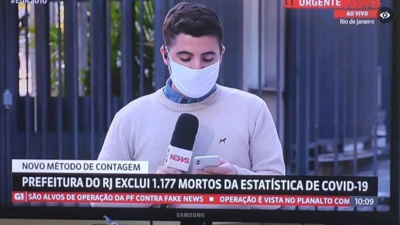

'--------------------------------------------------'

'Rank: 1 Val: 0.14405086636543274'

'102730_eng'

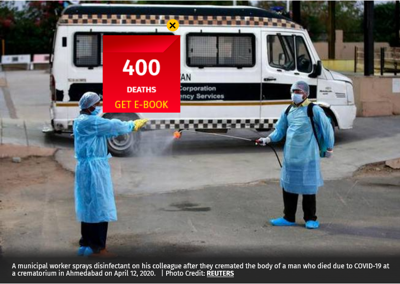

'--------------------------------------------------'

'Rank: 2 Val: 0.11350078880786896'

'102141_2_eng'

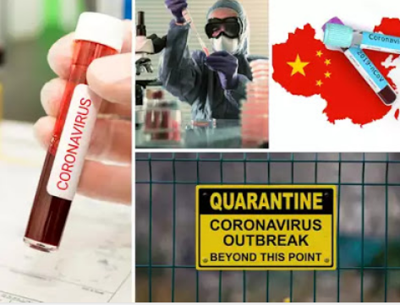

'--------------------------------------------------'

In [18]:
my_obj.show_results(
    search_query3[0],
)

## Improve the search results

For even better results, a slightly different approach has been prepared that can improve search results. It is quite resource-intensive, so it is applied after the main algorithm has found the most relevant images. This approach works only with text queries. Among the parameters you can choose 3 models: `"blip_base"`, `"blip_large"`, `"blip2_coco"`. If you get an `Out of Memory` error, try reducing the batch_size value (minimum = 1), which is the number of images being processed simultaneously. With the parameter `need_grad_cam = True/False` you can enable the calculation of the heat map of each image to be processed. Thus the `image_text_match_reordering` function calculates new similarity values and new ranks for each image. The resulting values are added to the general dictionary.

In [19]:
itm_model = "blip_base"
# itm_model = "blip_large"
# itm_model = "blip2_coco"

In [20]:
itm_scores, image_gradcam_with_itm = my_obj.image_text_match_reordering(
    search_query3,
    itm_model,
    image_keys,
    sorted_lists,
    batch_size=1,
    need_grad_cam=True,
)

  0%|          | 0.00/1.78G [00:00<?, ?B/s]

  0%|          | 816k/1.78G [00:00<03:50, 8.28MB/s]

  0%|          | 3.62M/1.78G [00:00<01:33, 20.4MB/s]

  0%|          | 6.12M/1.78G [00:00<01:23, 22.7MB/s]

  1%|          | 9.93M/1.78G [00:00<01:05, 29.1MB/s]

  1%|          | 13.6M/1.78G [00:00<00:58, 32.4MB/s]

  1%|          | 17.3M/1.78G [00:00<00:55, 34.0MB/s]

  1%|          | 20.5M/1.78G [00:00<00:59, 31.6MB/s]

  1%|▏         | 25.3M/1.78G [00:00<00:51, 36.8MB/s]

  2%|▏         | 28.8M/1.78G [00:00<00:59, 31.8MB/s]

  2%|▏         | 32.0M/1.78G [00:01<01:03, 29.7MB/s]

  2%|▏         | 35.6M/1.78G [00:01<00:58, 31.8MB/s]

  2%|▏         | 38.7M/1.78G [00:01<01:13, 25.4MB/s]

  2%|▏         | 41.6M/1.78G [00:01<01:10, 26.4MB/s]

  2%|▏         | 44.6M/1.78G [00:01<01:07, 27.6MB/s]

  3%|▎         | 47.5M/1.78G [00:01<01:06, 28.1MB/s]

  3%|▎         | 50.3M/1.78G [00:01<01:10, 26.3MB/s]

  3%|▎         | 54.0M/1.78G [00:01<01:02, 29.7MB/s]

  3%|▎         | 57.0M/1.78G [00:02<01:12, 25.4MB/s]

  3%|▎         | 59.6M/1.78G [00:02<01:26, 21.3MB/s]

  3%|▎         | 62.1M/1.78G [00:02<01:21, 22.5MB/s]

  4%|▎         | 64.4M/1.78G [00:02<01:34, 19.5MB/s]

  4%|▎         | 66.8M/1.78G [00:02<01:31, 20.1MB/s]

  4%|▍         | 69.8M/1.78G [00:02<01:20, 22.9MB/s]

  4%|▍         | 72.6M/1.78G [00:02<01:15, 24.2MB/s]

  4%|▍         | 75.0M/1.78G [00:03<01:18, 23.3MB/s]

  4%|▍         | 77.6M/1.78G [00:03<01:14, 24.4MB/s]

  4%|▍         | 80.3M/1.78G [00:03<01:11, 25.4MB/s]

  5%|▍         | 83.0M/1.78G [00:03<01:10, 25.7MB/s]

  5%|▍         | 85.5M/1.78G [00:03<01:14, 24.4MB/s]

  5%|▍         | 87.9M/1.78G [00:03<01:15, 24.0MB/s]

  5%|▌         | 92.5M/1.78G [00:03<00:59, 30.7MB/s]

  5%|▌         | 95.5M/1.78G [00:03<00:58, 30.9MB/s]

  5%|▌         | 98.5M/1.78G [00:03<01:07, 26.9MB/s]

  6%|▌         | 101M/1.78G [00:04<01:25, 21.2MB/s] 

  6%|▌         | 103M/1.78G [00:04<01:36, 18.7MB/s]

  6%|▌         | 105M/1.78G [00:04<01:35, 18.8MB/s]

  6%|▌         | 108M/1.78G [00:04<01:29, 20.1MB/s]

  6%|▌         | 111M/1.78G [00:04<01:22, 21.9MB/s]

  6%|▌         | 113M/1.78G [00:04<01:19, 22.6MB/s]

  6%|▋         | 115M/1.78G [00:04<01:21, 21.9MB/s]

  6%|▋         | 117M/1.78G [00:04<01:21, 21.9MB/s]

  7%|▋         | 120M/1.78G [00:05<01:21, 21.9MB/s]

  7%|▋         | 122M/1.78G [00:05<01:15, 23.5MB/s]

  7%|▋         | 125M/1.78G [00:05<01:09, 25.5MB/s]

  7%|▋         | 128M/1.78G [00:05<01:08, 25.9MB/s]

  7%|▋         | 130M/1.78G [00:05<01:15, 23.4MB/s]

  7%|▋         | 133M/1.78G [00:05<01:12, 24.4MB/s]

  7%|▋         | 136M/1.78G [00:05<01:14, 23.6MB/s]

  8%|▊         | 138M/1.78G [00:05<01:19, 22.3MB/s]

  8%|▊         | 141M/1.78G [00:05<01:07, 26.0MB/s]

  8%|▊         | 144M/1.78G [00:06<01:07, 26.2MB/s]

  8%|▊         | 147M/1.78G [00:06<01:04, 27.3MB/s]

  8%|▊         | 149M/1.78G [00:06<01:05, 26.8MB/s]

  8%|▊         | 153M/1.78G [00:06<01:01, 28.3MB/s]

  9%|▊         | 155M/1.78G [00:06<01:09, 25.3MB/s]

  9%|▊         | 159M/1.78G [00:06<01:00, 28.7MB/s]

  9%|▉         | 162M/1.78G [00:06<01:08, 25.2MB/s]

  9%|▉         | 164M/1.78G [00:06<01:08, 25.3MB/s]

  9%|▉         | 167M/1.78G [00:07<01:29, 19.3MB/s]

  9%|▉         | 169M/1.78G [00:07<01:29, 19.3MB/s]

  9%|▉         | 172M/1.78G [00:07<01:21, 21.1MB/s]

 10%|▉         | 174M/1.78G [00:07<01:22, 20.9MB/s]

 10%|▉         | 176M/1.78G [00:07<01:24, 20.5MB/s]

 10%|▉         | 178M/1.78G [00:07<01:22, 20.8MB/s]

 10%|▉         | 181M/1.78G [00:07<01:14, 23.2MB/s]

 10%|█         | 186M/1.78G [00:07<00:54, 31.2MB/s]

 10%|█         | 189M/1.78G [00:07<00:56, 30.1MB/s]

 11%|█         | 192M/1.78G [00:08<00:58, 29.2MB/s]

 11%|█         | 195M/1.78G [00:08<00:58, 28.9MB/s]

 11%|█         | 199M/1.78G [00:08<00:51, 33.2MB/s]

 11%|█         | 202M/1.78G [00:08<00:57, 29.7MB/s]

 11%|█▏        | 207M/1.78G [00:08<00:49, 34.1MB/s]

 12%|█▏        | 210M/1.78G [00:08<00:56, 29.7MB/s]

 12%|█▏        | 213M/1.78G [00:08<01:03, 26.4MB/s]

 12%|█▏        | 217M/1.78G [00:08<00:54, 30.8MB/s]

 12%|█▏        | 220M/1.78G [00:09<01:05, 25.6MB/s]

 12%|█▏        | 223M/1.78G [00:09<01:06, 25.0MB/s]

 12%|█▏        | 226M/1.78G [00:09<01:02, 26.8MB/s]

 13%|█▎        | 231M/1.78G [00:09<00:51, 32.2MB/s]

 13%|█▎        | 234M/1.78G [00:09<00:50, 32.7MB/s]

 13%|█▎        | 239M/1.78G [00:09<00:43, 37.7MB/s]

 13%|█▎        | 243M/1.78G [00:09<00:42, 38.6MB/s]

 14%|█▎        | 247M/1.78G [00:09<00:46, 35.4MB/s]

 14%|█▍        | 252M/1.78G [00:09<00:41, 39.5MB/s]

 14%|█▍        | 256M/1.78G [00:10<00:46, 35.3MB/s]

 14%|█▍        | 260M/1.78G [00:10<00:45, 36.4MB/s]

 14%|█▍        | 263M/1.78G [00:10<00:44, 36.6MB/s]

 15%|█▍        | 267M/1.78G [00:10<00:47, 34.1MB/s]

 15%|█▍        | 270M/1.78G [00:10<00:50, 32.4MB/s]

 15%|█▌        | 273M/1.78G [00:10<00:50, 31.9MB/s]

 15%|█▌        | 276M/1.78G [00:10<00:57, 28.1MB/s]

 15%|█▌        | 279M/1.78G [00:10<00:55, 28.9MB/s]

 16%|█▌        | 282M/1.78G [00:11<00:59, 26.9MB/s]

 16%|█▌        | 285M/1.78G [00:11<01:02, 25.7MB/s]

 16%|█▌        | 289M/1.78G [00:11<00:54, 29.7MB/s]

 16%|█▌        | 292M/1.78G [00:11<01:04, 24.7MB/s]

 16%|█▌        | 294M/1.78G [00:11<01:04, 25.0MB/s]

 16%|█▋        | 297M/1.78G [00:11<01:02, 25.5MB/s]

 16%|█▋        | 299M/1.78G [00:11<01:05, 24.5MB/s]

 17%|█▋        | 302M/1.78G [00:11<01:04, 24.5MB/s]

 17%|█▋        | 306M/1.78G [00:12<00:57, 27.6MB/s]

 17%|█▋        | 309M/1.78G [00:12<00:56, 27.9MB/s]

 17%|█▋        | 312M/1.78G [00:12<01:03, 25.0MB/s]

 17%|█▋        | 314M/1.78G [00:12<01:10, 22.4MB/s]

 17%|█▋        | 317M/1.78G [00:12<01:05, 24.0MB/s]

 18%|█▊        | 319M/1.78G [00:12<01:14, 21.1MB/s]

 18%|█▊        | 322M/1.78G [00:12<01:09, 22.7MB/s]

 18%|█▊        | 325M/1.78G [00:12<01:03, 24.6MB/s]

 18%|█▊        | 328M/1.78G [00:13<01:01, 25.5MB/s]

 18%|█▊        | 330M/1.78G [00:13<01:00, 26.0MB/s]

 18%|█▊        | 333M/1.78G [00:13<00:59, 26.2MB/s]

 18%|█▊        | 336M/1.78G [00:13<00:58, 26.8MB/s]

 19%|█▊        | 338M/1.78G [00:13<01:19, 19.5MB/s]

 19%|█▉        | 342M/1.78G [00:13<01:09, 22.2MB/s]

 19%|█▉        | 344M/1.78G [00:13<01:32, 16.8MB/s]

 19%|█▉        | 347M/1.78G [00:13<01:21, 18.9MB/s]

 19%|█▉        | 349M/1.78G [00:14<01:13, 21.1MB/s]

 19%|█▉        | 353M/1.78G [00:14<00:58, 26.4MB/s]

 20%|█▉        | 356M/1.78G [00:14<00:56, 27.1MB/s]

 20%|█▉        | 359M/1.78G [00:14<00:55, 27.5MB/s]

 20%|█▉        | 362M/1.78G [00:14<01:01, 24.8MB/s]

 20%|██        | 365M/1.78G [00:14<01:02, 24.5MB/s]

 20%|██        | 367M/1.78G [00:14<01:04, 23.6MB/s]

 20%|██        | 369M/1.78G [00:14<01:15, 20.1MB/s]

 20%|██        | 371M/1.78G [00:15<01:23, 18.3MB/s]

 21%|██        | 376M/1.78G [00:15<01:03, 23.9MB/s]

 21%|██        | 378M/1.78G [00:15<01:01, 24.6MB/s]

 21%|██        | 381M/1.78G [00:15<01:09, 21.8MB/s]

 21%|██        | 383M/1.78G [00:15<01:09, 21.7MB/s]

 21%|██        | 385M/1.78G [00:15<01:15, 19.9MB/s]

 21%|██▏       | 388M/1.78G [00:15<01:06, 22.5MB/s]

 21%|██▏       | 391M/1.78G [00:15<01:02, 24.1MB/s]

 22%|██▏       | 393M/1.78G [00:16<01:00, 24.5MB/s]

 22%|██▏       | 396M/1.78G [00:16<01:14, 19.9MB/s]

 22%|██▏       | 398M/1.78G [00:16<01:15, 19.8MB/s]

 22%|██▏       | 400M/1.78G [00:16<01:24, 17.6MB/s]

 22%|██▏       | 402M/1.78G [00:16<01:21, 18.3MB/s]

 22%|██▏       | 404M/1.78G [00:16<01:15, 19.7MB/s]

 22%|██▏       | 406M/1.78G [00:16<01:25, 17.3MB/s]

 23%|██▎       | 410M/1.78G [00:16<01:07, 21.9MB/s]

 23%|██▎       | 412M/1.78G [00:17<01:02, 23.5MB/s]

 23%|██▎       | 415M/1.78G [00:17<01:05, 22.5MB/s]

 23%|██▎       | 418M/1.78G [00:17<00:55, 26.3MB/s]

 23%|██▎       | 421M/1.78G [00:17<01:16, 19.3MB/s]

 23%|██▎       | 424M/1.78G [00:17<01:05, 22.4MB/s]

 23%|██▎       | 427M/1.78G [00:17<01:14, 19.7MB/s]

 24%|██▎       | 429M/1.78G [00:17<01:11, 20.4MB/s]

 24%|██▎       | 432M/1.78G [00:17<01:02, 23.1MB/s]

 24%|██▍       | 434M/1.78G [00:18<01:00, 24.2MB/s]

 24%|██▍       | 437M/1.78G [00:18<01:04, 22.6MB/s]

 24%|██▍       | 439M/1.78G [00:18<01:06, 21.9MB/s]

 24%|██▍       | 442M/1.78G [00:18<00:59, 24.4MB/s]

 24%|██▍       | 445M/1.78G [00:18<00:55, 25.8MB/s]

 25%|██▍       | 448M/1.78G [00:18<01:05, 21.9MB/s]

 25%|██▍       | 450M/1.78G [00:18<01:09, 20.7MB/s]

 25%|██▍       | 453M/1.78G [00:18<00:59, 24.0MB/s]

 25%|██▌       | 455M/1.78G [00:19<01:10, 20.2MB/s]

 25%|██▌       | 458M/1.78G [00:19<01:05, 21.8MB/s]

 25%|██▌       | 460M/1.78G [00:19<01:11, 19.9MB/s]

 25%|██▌       | 462M/1.78G [00:19<01:16, 18.6MB/s]

 26%|██▌       | 465M/1.78G [00:19<01:09, 20.5MB/s]

 26%|██▌       | 467M/1.78G [00:19<01:21, 17.5MB/s]

 26%|██▌       | 469M/1.78G [00:19<01:13, 19.3MB/s]

 26%|██▌       | 472M/1.78G [00:20<01:12, 19.5MB/s]

 26%|██▌       | 474M/1.78G [00:20<01:34, 14.9MB/s]

 26%|██▌       | 476M/1.78G [00:20<01:27, 16.0MB/s]

 26%|██▋       | 480M/1.78G [00:20<01:01, 22.8MB/s]

 27%|██▋       | 483M/1.78G [00:20<00:57, 24.5MB/s]

 27%|██▋       | 486M/1.78G [00:20<00:53, 25.9MB/s]

 27%|██▋       | 490M/1.78G [00:20<00:47, 29.1MB/s]

 27%|██▋       | 493M/1.78G [00:20<00:43, 32.3MB/s]

 27%|██▋       | 497M/1.78G [00:21<00:47, 29.1MB/s]

 28%|██▊       | 501M/1.78G [00:21<00:42, 32.4MB/s]

 28%|██▊       | 504M/1.78G [00:21<00:44, 31.1MB/s]

 28%|██▊       | 508M/1.78G [00:21<00:39, 34.9MB/s]

 28%|██▊       | 512M/1.78G [00:21<00:37, 37.0MB/s]

 28%|██▊       | 516M/1.78G [00:21<00:39, 35.0MB/s]

 29%|██▊       | 519M/1.78G [00:21<00:39, 34.1MB/s]

 29%|██▊       | 523M/1.78G [00:21<00:40, 33.3MB/s]

 29%|██▉       | 528M/1.78G [00:21<00:34, 39.2MB/s]

 29%|██▉       | 532M/1.78G [00:22<00:38, 34.8MB/s]

 29%|██▉       | 535M/1.78G [00:22<00:45, 29.8MB/s]

 30%|██▉       | 538M/1.78G [00:22<00:46, 28.9MB/s]

 30%|██▉       | 541M/1.78G [00:22<00:48, 27.5MB/s]

 30%|██▉       | 544M/1.78G [00:22<00:47, 27.9MB/s]

 30%|███       | 547M/1.78G [00:22<00:54, 24.6MB/s]

 30%|███       | 549M/1.78G [00:22<00:54, 24.3MB/s]

 30%|███       | 551M/1.78G [00:22<01:06, 20.1MB/s]

 30%|███       | 554M/1.78G [00:23<01:00, 22.0MB/s]

 31%|███       | 557M/1.78G [00:23<00:56, 23.4MB/s]

 31%|███       | 559M/1.78G [00:23<00:57, 22.9MB/s]

 31%|███       | 561M/1.78G [00:23<01:09, 19.1MB/s]

 31%|███       | 566M/1.78G [00:23<00:51, 25.4MB/s]

 31%|███       | 569M/1.78G [00:23<00:51, 25.6MB/s]

 31%|███▏      | 572M/1.78G [00:23<00:48, 27.0MB/s]

 32%|███▏      | 576M/1.78G [00:23<00:42, 30.8MB/s]

 32%|███▏      | 579M/1.78G [00:24<00:49, 26.4MB/s]

 32%|███▏      | 581M/1.78G [00:24<00:50, 25.6MB/s]

 32%|███▏      | 584M/1.78G [00:24<00:51, 25.0MB/s]

 32%|███▏      | 587M/1.78G [00:24<00:49, 26.2MB/s]

 32%|███▏      | 590M/1.78G [00:24<00:48, 26.9MB/s]

 33%|███▎      | 592M/1.78G [00:24<00:46, 27.4MB/s]

 33%|███▎      | 595M/1.78G [00:24<00:51, 25.0MB/s]

 33%|███▎      | 598M/1.78G [00:24<00:56, 22.9MB/s]

 33%|███▎      | 600M/1.78G [00:24<00:52, 24.3MB/s]

 33%|███▎      | 603M/1.78G [00:25<00:53, 24.0MB/s]

 33%|███▎      | 605M/1.78G [00:25<00:56, 22.4MB/s]

 33%|███▎      | 608M/1.78G [00:25<00:49, 25.7MB/s]

 34%|███▎      | 611M/1.78G [00:25<00:48, 26.0MB/s]

 34%|███▎      | 614M/1.78G [00:25<01:03, 20.1MB/s]

 34%|███▍      | 616M/1.78G [00:25<01:11, 17.7MB/s]

 34%|███▍      | 619M/1.78G [00:25<01:01, 20.5MB/s]

 34%|███▍      | 623M/1.78G [00:26<00:49, 25.4MB/s]

 34%|███▍      | 625M/1.78G [00:26<00:48, 26.0MB/s]

 35%|███▍      | 628M/1.78G [00:26<00:51, 24.2MB/s]

 35%|███▍      | 631M/1.78G [00:26<00:49, 25.2MB/s]

 35%|███▍      | 634M/1.78G [00:26<00:48, 25.6MB/s]

 35%|███▍      | 636M/1.78G [00:26<00:48, 25.4MB/s]

 35%|███▌      | 640M/1.78G [00:26<00:42, 29.3MB/s]

 35%|███▌      | 643M/1.78G [00:26<00:43, 28.6MB/s]

 36%|███▌      | 648M/1.78G [00:26<00:35, 34.4MB/s]

 36%|███▌      | 651M/1.78G [00:27<00:37, 32.6MB/s]

 36%|███▌      | 654M/1.78G [00:27<00:39, 30.7MB/s]

 36%|███▌      | 657M/1.78G [00:27<00:39, 30.8MB/s]

 36%|███▋      | 661M/1.78G [00:27<00:36, 32.9MB/s]

 37%|███▋      | 665M/1.78G [00:27<00:33, 35.7MB/s]

 37%|███▋      | 668M/1.78G [00:27<00:36, 32.9MB/s]

 37%|███▋      | 672M/1.78G [00:27<00:38, 31.1MB/s]

 37%|███▋      | 675M/1.78G [00:27<00:37, 31.9MB/s]

 37%|███▋      | 678M/1.78G [00:27<00:40, 29.8MB/s]

 37%|███▋      | 681M/1.78G [00:28<00:39, 30.0MB/s]

 38%|███▊      | 684M/1.78G [00:28<00:41, 28.6MB/s]

 38%|███▊      | 686M/1.78G [00:28<00:42, 28.2MB/s]

 38%|███▊      | 689M/1.78G [00:28<00:42, 27.9MB/s]

 38%|███▊      | 693M/1.78G [00:28<00:37, 31.4MB/s]

 38%|███▊      | 696M/1.78G [00:28<00:42, 27.4MB/s]

 38%|███▊      | 699M/1.78G [00:28<00:49, 23.7MB/s]

 39%|███▊      | 702M/1.78G [00:28<00:45, 25.8MB/s]

 39%|███▊      | 705M/1.78G [00:28<00:44, 26.2MB/s]

 39%|███▉      | 707M/1.78G [00:29<00:48, 24.1MB/s]

 39%|███▉      | 710M/1.78G [00:29<00:47, 24.4MB/s]

 39%|███▉      | 712M/1.78G [00:29<00:50, 22.9MB/s]

 39%|███▉      | 715M/1.78G [00:29<00:48, 24.0MB/s]

 39%|███▉      | 717M/1.78G [00:29<00:49, 23.5MB/s]

 40%|███▉      | 720M/1.78G [00:29<00:47, 24.1MB/s]

 40%|███▉      | 723M/1.78G [00:29<00:44, 25.6MB/s]

 40%|███▉      | 725M/1.78G [00:29<00:45, 25.4MB/s]

 40%|████      | 729M/1.78G [00:29<00:38, 29.9MB/s]

 40%|████      | 732M/1.78G [00:30<00:39, 29.0MB/s]

 40%|████      | 735M/1.78G [00:30<00:40, 28.2MB/s]

 41%|████      | 737M/1.78G [00:30<00:44, 25.5MB/s]

 41%|████      | 740M/1.78G [00:30<00:45, 25.1MB/s]

 41%|████      | 742M/1.78G [00:30<00:51, 22.1MB/s]

 41%|████      | 746M/1.78G [00:30<00:45, 25.0MB/s]

 41%|████      | 748M/1.78G [00:30<00:57, 19.7MB/s]

 41%|████      | 750M/1.78G [00:31<01:02, 18.1MB/s]

 41%|████▏     | 752M/1.78G [00:31<01:02, 18.0MB/s]

 41%|████▏     | 755M/1.78G [00:31<00:55, 20.2MB/s]

 42%|████▏     | 757M/1.78G [00:31<00:52, 21.3MB/s]

 42%|████▏     | 759M/1.78G [00:31<00:56, 19.7MB/s]

 42%|████▏     | 761M/1.78G [00:31<00:57, 19.4MB/s]

 42%|████▏     | 764M/1.78G [00:31<00:53, 20.9MB/s]

 42%|████▏     | 766M/1.78G [00:31<00:49, 22.3MB/s]

 42%|████▏     | 768M/1.78G [00:31<00:53, 20.5MB/s]

 42%|████▏     | 770M/1.78G [00:32<00:53, 20.5MB/s]

 42%|████▏     | 772M/1.78G [00:32<00:53, 20.6MB/s]

 43%|████▎     | 774M/1.78G [00:32<00:54, 20.3MB/s]

 43%|████▎     | 776M/1.78G [00:32<00:52, 20.8MB/s]

 43%|████▎     | 778M/1.78G [00:32<00:54, 20.0MB/s]

 43%|████▎     | 780M/1.78G [00:32<00:54, 20.1MB/s]

 43%|████▎     | 784M/1.78G [00:32<00:44, 24.2MB/s]

 43%|████▎     | 786M/1.78G [00:32<00:43, 24.8MB/s]

 43%|████▎     | 789M/1.78G [00:32<00:46, 23.1MB/s]

 44%|████▎     | 792M/1.78G [00:33<00:40, 26.9MB/s]

 44%|████▎     | 795M/1.78G [00:33<00:40, 26.8MB/s]

 44%|████▍     | 798M/1.78G [00:33<00:39, 26.9MB/s]

 44%|████▍     | 800M/1.78G [00:33<00:43, 24.6MB/s]

 44%|████▍     | 803M/1.78G [00:33<00:41, 25.7MB/s]

 44%|████▍     | 805M/1.78G [00:33<00:40, 26.0MB/s]

 44%|████▍     | 808M/1.78G [00:33<00:42, 25.0MB/s]

 45%|████▍     | 811M/1.78G [00:33<00:39, 27.1MB/s]

 45%|████▍     | 814M/1.78G [00:33<00:40, 26.1MB/s]

 45%|████▍     | 816M/1.78G [00:34<00:43, 24.2MB/s]

 45%|████▍     | 819M/1.78G [00:34<00:49, 21.1MB/s]

 45%|████▌     | 821M/1.78G [00:34<00:48, 21.6MB/s]

 45%|████▌     | 823M/1.78G [00:34<00:45, 22.8MB/s]

 45%|████▌     | 826M/1.78G [00:34<00:50, 20.5MB/s]

 45%|████▌     | 828M/1.78G [00:34<01:02, 16.7MB/s]

 46%|████▌     | 830M/1.78G [00:34<00:58, 17.9MB/s]

 46%|████▌     | 832M/1.78G [00:34<00:52, 19.6MB/s]

 46%|████▌     | 834M/1.78G [00:35<00:57, 18.0MB/s]

 46%|████▌     | 836M/1.78G [00:35<01:01, 16.7MB/s]

 46%|████▌     | 838M/1.78G [00:35<01:00, 17.0MB/s]

 46%|████▌     | 840M/1.78G [00:35<01:00, 17.1MB/s]

 46%|████▌     | 841M/1.78G [00:35<01:01, 16.8MB/s]

 46%|████▋     | 843M/1.78G [00:35<01:11, 14.4MB/s]

 46%|████▋     | 844M/1.78G [00:35<01:18, 13.1MB/s]

 47%|████▋     | 848M/1.78G [00:35<00:57, 17.9MB/s]

 47%|████▋     | 849M/1.78G [00:36<00:58, 17.4MB/s]

 47%|████▋     | 852M/1.78G [00:36<00:52, 19.5MB/s]

 47%|████▋     | 854M/1.78G [00:36<00:56, 17.9MB/s]

 47%|████▋     | 856M/1.78G [00:36<00:51, 19.7MB/s]

 47%|████▋     | 858M/1.78G [00:36<00:51, 19.6MB/s]

 47%|████▋     | 860M/1.78G [00:36<00:57, 17.5MB/s]

 47%|████▋     | 863M/1.78G [00:36<00:49, 20.4MB/s]

 48%|████▊     | 866M/1.78G [00:36<00:45, 22.1MB/s]

 48%|████▊     | 868M/1.78G [00:36<00:43, 22.8MB/s]

 48%|████▊     | 871M/1.78G [00:37<00:40, 24.3MB/s]

 48%|████▊     | 873M/1.78G [00:37<00:39, 25.5MB/s]

 48%|████▊     | 877M/1.78G [00:37<00:33, 29.4MB/s]

 48%|████▊     | 880M/1.78G [00:37<00:38, 25.3MB/s]

 49%|████▊     | 883M/1.78G [00:37<00:37, 26.0MB/s]

 49%|████▊     | 885M/1.78G [00:37<00:38, 25.8MB/s]

 49%|████▉     | 888M/1.78G [00:37<00:38, 25.5MB/s]

 49%|████▉     | 892M/1.78G [00:37<00:33, 29.4MB/s]

 49%|████▉     | 895M/1.78G [00:37<00:35, 27.0MB/s]

 49%|████▉     | 898M/1.78G [00:38<00:33, 29.2MB/s]

 50%|████▉     | 902M/1.78G [00:38<00:29, 32.8MB/s]

 50%|████▉     | 905M/1.78G [00:38<00:31, 30.1MB/s]

 50%|████▉     | 908M/1.78G [00:38<00:31, 30.1MB/s]

 50%|█████     | 913M/1.78G [00:38<00:27, 35.2MB/s]

 50%|█████     | 917M/1.78G [00:38<00:26, 35.8MB/s]

 51%|█████     | 921M/1.78G [00:38<00:24, 38.3MB/s]

 51%|█████     | 925M/1.78G [00:38<00:24, 38.1MB/s]

 51%|█████     | 928M/1.78G [00:38<00:24, 38.8MB/s]

 51%|█████▏    | 933M/1.78G [00:39<00:22, 41.8MB/s]

 51%|█████▏    | 937M/1.78G [00:39<00:26, 35.0MB/s]

 52%|█████▏    | 941M/1.78G [00:39<00:30, 30.7MB/s]

 52%|█████▏    | 944M/1.78G [00:39<00:35, 25.8MB/s]

 52%|█████▏    | 947M/1.78G [00:39<00:35, 25.5MB/s]

 52%|█████▏    | 949M/1.78G [00:39<00:39, 23.4MB/s]

 52%|█████▏    | 952M/1.78G [00:39<00:37, 24.0MB/s]

 52%|█████▏    | 955M/1.78G [00:40<00:34, 26.6MB/s]

 53%|█████▎    | 958M/1.78G [00:40<00:33, 26.8MB/s]

 53%|█████▎    | 960M/1.78G [00:40<00:35, 25.6MB/s]

 53%|█████▎    | 963M/1.78G [00:40<00:34, 26.0MB/s]

 53%|█████▎    | 966M/1.78G [00:40<00:34, 26.1MB/s]

 53%|█████▎    | 968M/1.78G [00:40<00:35, 24.9MB/s]

 53%|█████▎    | 971M/1.78G [00:40<00:33, 26.7MB/s]

 54%|█████▎    | 974M/1.78G [00:40<00:33, 26.9MB/s]

 54%|█████▎    | 976M/1.78G [00:40<00:37, 23.7MB/s]

 54%|█████▍    | 979M/1.78G [00:41<00:35, 24.6MB/s]

 54%|█████▍    | 982M/1.78G [00:41<00:32, 26.8MB/s]

 54%|█████▍    | 985M/1.78G [00:41<00:35, 24.7MB/s]

 54%|█████▍    | 989M/1.78G [00:41<00:30, 28.2MB/s]

 54%|█████▍    | 991M/1.78G [00:41<00:41, 20.7MB/s]

 55%|█████▍    | 994M/1.78G [00:41<00:37, 22.8MB/s]

 55%|█████▍    | 997M/1.78G [00:41<00:34, 24.9MB/s]

 55%|█████▍    | 0.98G/1.78G [00:41<00:33, 26.1MB/s]

 55%|█████▌    | 0.98G/1.78G [00:41<00:30, 27.6MB/s]

 55%|█████▌    | 0.98G/1.78G [00:42<00:38, 22.1MB/s]

 55%|█████▌    | 0.99G/1.78G [00:42<00:32, 25.8MB/s]

 56%|█████▌    | 0.99G/1.78G [00:42<00:33, 25.7MB/s]

 56%|█████▌    | 0.99G/1.78G [00:42<00:30, 27.2MB/s]

 56%|█████▌    | 1.00G/1.78G [00:42<00:26, 32.3MB/s]

 56%|█████▌    | 1.00G/1.78G [00:42<00:29, 28.7MB/s]

 56%|█████▋    | 1.00G/1.78G [00:42<00:29, 28.2MB/s]

 57%|█████▋    | 1.01G/1.78G [00:42<00:29, 28.4MB/s]

 57%|█████▋    | 1.01G/1.78G [00:43<00:29, 27.7MB/s]

 57%|█████▋    | 1.01G/1.78G [00:43<00:34, 23.8MB/s]

 57%|█████▋    | 1.01G/1.78G [00:43<00:31, 26.3MB/s]

 57%|█████▋    | 1.02G/1.78G [00:43<00:30, 26.4MB/s]

 57%|█████▋    | 1.02G/1.78G [00:43<00:55, 14.6MB/s]

 57%|█████▋    | 1.02G/1.78G [00:43<00:52, 15.4MB/s]

 58%|█████▊    | 1.02G/1.78G [00:44<00:47, 17.2MB/s]

 58%|█████▊    | 1.03G/1.78G [00:44<00:44, 18.0MB/s]

 58%|█████▊    | 1.03G/1.78G [00:44<00:39, 20.3MB/s]

 58%|█████▊    | 1.03G/1.78G [00:44<00:38, 21.1MB/s]

 58%|█████▊    | 1.03G/1.78G [00:44<00:34, 23.0MB/s]

 58%|█████▊    | 1.04G/1.78G [00:44<00:31, 25.0MB/s]

 58%|█████▊    | 1.04G/1.78G [00:44<00:27, 28.4MB/s]

 59%|█████▊    | 1.04G/1.78G [00:44<00:28, 27.8MB/s]

 59%|█████▉    | 1.04G/1.78G [00:44<00:32, 24.1MB/s]

 59%|█████▉    | 1.05G/1.78G [00:45<00:34, 22.8MB/s]

 59%|█████▉    | 1.05G/1.78G [00:45<00:27, 28.4MB/s]

 59%|█████▉    | 1.05G/1.78G [00:45<00:28, 27.7MB/s]

 59%|█████▉    | 1.06G/1.78G [00:45<00:28, 26.8MB/s]

 60%|█████▉    | 1.06G/1.78G [00:45<00:28, 27.4MB/s]

 60%|█████▉    | 1.06G/1.78G [00:45<00:28, 26.9MB/s]

 60%|█████▉    | 1.07G/1.78G [00:45<00:26, 29.3MB/s]

 60%|██████    | 1.07G/1.78G [00:45<00:26, 29.1MB/s]

 60%|██████    | 1.07G/1.78G [00:45<00:26, 29.1MB/s]

 60%|██████    | 1.07G/1.78G [00:46<00:25, 30.0MB/s]

 61%|██████    | 1.08G/1.78G [00:46<00:30, 24.4MB/s]

 61%|██████    | 1.08G/1.78G [00:46<00:29, 25.4MB/s]

 61%|██████    | 1.08G/1.78G [00:46<00:41, 18.0MB/s]

 61%|██████    | 1.09G/1.78G [00:46<00:32, 22.8MB/s]

 61%|██████    | 1.09G/1.78G [00:46<00:31, 23.3MB/s]

 61%|██████▏   | 1.09G/1.78G [00:46<00:29, 25.1MB/s]

 62%|██████▏   | 1.09G/1.78G [00:47<00:25, 28.6MB/s]

 62%|██████▏   | 1.10G/1.78G [00:47<00:25, 28.2MB/s]

 62%|██████▏   | 1.10G/1.78G [00:47<00:25, 28.6MB/s]

 62%|██████▏   | 1.11G/1.78G [00:47<00:20, 34.8MB/s]

 62%|██████▏   | 1.11G/1.78G [00:47<00:18, 38.1MB/s]

 63%|██████▎   | 1.11G/1.78G [00:47<00:23, 30.5MB/s]

 63%|██████▎   | 1.12G/1.78G [00:47<00:23, 29.9MB/s]

 63%|██████▎   | 1.12G/1.78G [00:47<00:24, 28.4MB/s]

 63%|██████▎   | 1.12G/1.78G [00:47<00:22, 31.0MB/s]

 63%|██████▎   | 1.13G/1.78G [00:48<00:21, 32.6MB/s]

 64%|██████▎   | 1.13G/1.78G [00:48<00:21, 32.4MB/s]

 64%|██████▎   | 1.13G/1.78G [00:48<00:21, 33.0MB/s]

 64%|██████▍   | 1.14G/1.78G [00:48<00:24, 27.6MB/s]

 64%|██████▍   | 1.14G/1.78G [00:48<00:31, 21.8MB/s]

 64%|██████▍   | 1.14G/1.78G [00:48<00:35, 19.5MB/s]

 64%|██████▍   | 1.14G/1.78G [00:48<00:38, 17.9MB/s]

 64%|██████▍   | 1.15G/1.78G [00:49<00:41, 16.3MB/s]

 65%|██████▍   | 1.15G/1.78G [00:49<00:41, 16.4MB/s]

 65%|██████▍   | 1.15G/1.78G [00:49<00:37, 18.0MB/s]

 65%|██████▍   | 1.15G/1.78G [00:49<00:32, 20.5MB/s]

 65%|██████▍   | 1.15G/1.78G [00:49<00:31, 21.1MB/s]

 65%|██████▌   | 1.16G/1.78G [00:49<00:25, 25.9MB/s]

 65%|██████▌   | 1.16G/1.78G [00:49<00:24, 27.1MB/s]

 65%|██████▌   | 1.16G/1.78G [00:49<00:28, 23.3MB/s]

 66%|██████▌   | 1.17G/1.78G [00:50<00:28, 23.2MB/s]

 66%|██████▌   | 1.17G/1.78G [00:50<00:24, 26.5MB/s]

 66%|██████▌   | 1.17G/1.78G [00:50<00:29, 22.4MB/s]

 66%|██████▌   | 1.17G/1.78G [00:50<00:30, 21.4MB/s]

 66%|██████▌   | 1.18G/1.78G [00:50<00:31, 20.7MB/s]

 66%|██████▋   | 1.18G/1.78G [00:50<00:28, 22.6MB/s]

 66%|██████▋   | 1.18G/1.78G [00:50<00:30, 21.1MB/s]

 67%|██████▋   | 1.18G/1.78G [00:50<00:34, 18.7MB/s]

 67%|██████▋   | 1.18G/1.78G [00:51<00:34, 18.7MB/s]

 67%|██████▋   | 1.19G/1.78G [00:51<00:25, 24.6MB/s]

 67%|██████▋   | 1.19G/1.78G [00:51<00:28, 22.4MB/s]

 67%|██████▋   | 1.19G/1.78G [00:51<00:34, 18.3MB/s]

 67%|██████▋   | 1.19G/1.78G [00:51<00:33, 18.5MB/s]

 67%|██████▋   | 1.20G/1.78G [00:51<00:32, 19.3MB/s]

 67%|██████▋   | 1.20G/1.78G [00:51<00:30, 20.2MB/s]

 68%|██████▊   | 1.20G/1.78G [00:51<00:23, 26.3MB/s]

 68%|██████▊   | 1.21G/1.78G [00:51<00:23, 26.3MB/s]

 68%|██████▊   | 1.21G/1.78G [00:52<00:24, 24.8MB/s]

 68%|██████▊   | 1.21G/1.78G [00:52<00:24, 25.1MB/s]

 68%|██████▊   | 1.21G/1.78G [00:52<00:23, 25.7MB/s]

 68%|██████▊   | 1.22G/1.78G [00:52<00:21, 27.8MB/s]

 69%|██████▊   | 1.22G/1.78G [00:52<00:18, 32.0MB/s]

 69%|██████▉   | 1.22G/1.78G [00:52<00:19, 30.2MB/s]

 69%|██████▉   | 1.23G/1.78G [00:52<00:20, 29.2MB/s]

 69%|██████▉   | 1.23G/1.78G [00:52<00:21, 28.0MB/s]

 69%|██████▉   | 1.23G/1.78G [00:52<00:21, 26.9MB/s]

 69%|██████▉   | 1.23G/1.78G [00:53<00:20, 28.2MB/s]

 70%|██████▉   | 1.24G/1.78G [00:53<00:20, 28.5MB/s]

 70%|██████▉   | 1.24G/1.78G [00:53<00:19, 30.3MB/s]

 70%|██████▉   | 1.24G/1.78G [00:53<00:24, 23.4MB/s]

 70%|███████   | 1.25G/1.78G [00:53<00:20, 27.4MB/s]

 70%|███████   | 1.25G/1.78G [00:53<00:21, 26.9MB/s]

 70%|███████   | 1.25G/1.78G [00:53<00:21, 26.1MB/s]

 71%|███████   | 1.26G/1.78G [00:54<00:25, 22.2MB/s]

 71%|███████   | 1.26G/1.78G [00:54<00:23, 23.6MB/s]

 71%|███████   | 1.26G/1.78G [00:54<00:22, 24.9MB/s]

 71%|███████   | 1.26G/1.78G [00:54<00:18, 29.4MB/s]

 71%|███████▏  | 1.27G/1.78G [00:54<00:16, 32.2MB/s]

 72%|███████▏  | 1.27G/1.78G [00:54<00:22, 24.3MB/s]

 72%|███████▏  | 1.27G/1.78G [00:54<00:22, 24.0MB/s]

 72%|███████▏  | 1.28G/1.78G [00:54<00:23, 23.3MB/s]

 72%|███████▏  | 1.28G/1.78G [00:54<00:21, 24.8MB/s]

 72%|███████▏  | 1.28G/1.78G [00:55<00:22, 23.2MB/s]

 72%|███████▏  | 1.28G/1.78G [00:55<00:22, 23.3MB/s]

 72%|███████▏  | 1.29G/1.78G [00:55<00:19, 27.1MB/s]

 73%|███████▎  | 1.29G/1.78G [00:55<00:18, 27.9MB/s]

 73%|███████▎  | 1.29G/1.78G [00:55<00:16, 32.0MB/s]

 73%|███████▎  | 1.30G/1.78G [00:55<00:17, 29.4MB/s]

 73%|███████▎  | 1.30G/1.78G [00:55<00:17, 29.5MB/s]

 73%|███████▎  | 1.30G/1.78G [00:55<00:16, 31.1MB/s]

 74%|███████▎  | 1.31G/1.78G [00:56<00:18, 27.5MB/s]

 74%|███████▎  | 1.31G/1.78G [00:56<00:16, 30.6MB/s]

 74%|███████▍  | 1.31G/1.78G [00:56<00:16, 30.5MB/s]

 74%|███████▍  | 1.32G/1.78G [00:56<00:15, 31.6MB/s]

 74%|███████▍  | 1.32G/1.78G [00:56<00:17, 27.9MB/s]

 74%|███████▍  | 1.32G/1.78G [00:56<00:17, 27.3MB/s]

 75%|███████▍  | 1.32G/1.78G [00:56<00:18, 26.7MB/s]

 75%|███████▍  | 1.33G/1.78G [00:56<00:17, 28.2MB/s]

 75%|███████▍  | 1.33G/1.78G [00:56<00:17, 27.4MB/s]

 75%|███████▌  | 1.33G/1.78G [00:57<00:15, 30.0MB/s]

 75%|███████▌  | 1.34G/1.78G [00:57<00:17, 27.0MB/s]

 75%|███████▌  | 1.34G/1.78G [00:57<00:19, 23.8MB/s]

 76%|███████▌  | 1.34G/1.78G [00:57<00:18, 25.2MB/s]

 76%|███████▌  | 1.34G/1.78G [00:57<00:18, 25.8MB/s]

 76%|███████▌  | 1.35G/1.78G [00:57<00:17, 26.1MB/s]

 76%|███████▌  | 1.35G/1.78G [00:57<00:14, 30.9MB/s]

 76%|███████▌  | 1.35G/1.78G [00:57<00:15, 29.8MB/s]

 76%|███████▋  | 1.36G/1.78G [00:57<00:12, 35.6MB/s]

 77%|███████▋  | 1.36G/1.78G [00:58<00:12, 35.6MB/s]

 77%|███████▋  | 1.37G/1.78G [00:58<00:13, 32.1MB/s]

 77%|███████▋  | 1.37G/1.78G [00:58<00:13, 33.1MB/s]

 77%|███████▋  | 1.37G/1.78G [00:58<00:12, 35.5MB/s]

 77%|███████▋  | 1.38G/1.78G [00:58<00:12, 34.1MB/s]

 78%|███████▊  | 1.38G/1.78G [00:58<00:12, 34.8MB/s]

 78%|███████▊  | 1.38G/1.78G [00:58<00:11, 35.8MB/s]

 78%|███████▊  | 1.39G/1.78G [00:58<00:14, 29.5MB/s]

 78%|███████▊  | 1.39G/1.78G [00:58<00:13, 31.7MB/s]

 78%|███████▊  | 1.39G/1.78G [00:59<00:14, 28.7MB/s]

 79%|███████▊  | 1.40G/1.78G [00:59<00:12, 32.2MB/s]

 79%|███████▉  | 1.40G/1.78G [00:59<00:14, 27.4MB/s]

 79%|███████▉  | 1.40G/1.78G [00:59<00:13, 29.1MB/s]

 79%|███████▉  | 1.41G/1.78G [00:59<00:14, 27.7MB/s]

 79%|███████▉  | 1.41G/1.78G [00:59<00:11, 34.6MB/s]

 80%|███████▉  | 1.42G/1.78G [00:59<00:12, 30.8MB/s]

 80%|███████▉  | 1.42G/1.78G [01:00<00:13, 29.5MB/s]

 80%|████████  | 1.42G/1.78G [01:00<00:11, 32.0MB/s]

 80%|████████  | 1.43G/1.78G [01:00<00:13, 28.6MB/s]

 80%|████████  | 1.43G/1.78G [01:00<00:11, 32.1MB/s]

 81%|████████  | 1.43G/1.78G [01:00<00:12, 30.7MB/s]

 81%|████████  | 1.44G/1.78G [01:00<00:12, 29.8MB/s]

 81%|████████  | 1.44G/1.78G [01:00<00:12, 30.0MB/s]

 81%|████████  | 1.44G/1.78G [01:00<00:12, 28.1MB/s]

 81%|████████▏ | 1.44G/1.78G [01:01<00:14, 24.2MB/s]

 81%|████████▏ | 1.45G/1.78G [01:01<00:14, 23.7MB/s]

 82%|████████▏ | 1.45G/1.78G [01:01<00:14, 23.9MB/s]

 82%|████████▏ | 1.45G/1.78G [01:01<00:13, 25.0MB/s]

 82%|████████▏ | 1.45G/1.78G [01:01<00:13, 24.8MB/s]

 82%|████████▏ | 1.46G/1.78G [01:01<00:11, 29.7MB/s]

 82%|████████▏ | 1.46G/1.78G [01:01<00:12, 26.5MB/s]

 82%|████████▏ | 1.46G/1.78G [01:01<00:13, 25.6MB/s]

 83%|████████▎ | 1.47G/1.78G [01:01<00:12, 26.8MB/s]

 83%|████████▎ | 1.47G/1.78G [01:02<00:14, 23.0MB/s]

 83%|████████▎ | 1.47G/1.78G [01:02<00:11, 28.2MB/s]

 83%|████████▎ | 1.48G/1.78G [01:02<00:14, 23.0MB/s]

 83%|████████▎ | 1.48G/1.78G [01:02<00:13, 24.2MB/s]

 83%|████████▎ | 1.48G/1.78G [01:02<00:13, 24.4MB/s]

 83%|████████▎ | 1.48G/1.78G [01:02<00:12, 25.2MB/s]

 84%|████████▎ | 1.49G/1.78G [01:02<00:11, 27.4MB/s]

 84%|████████▍ | 1.49G/1.78G [01:02<00:12, 25.5MB/s]

 84%|████████▍ | 1.49G/1.78G [01:03<00:11, 26.1MB/s]

 84%|████████▍ | 1.50G/1.78G [01:03<00:10, 29.6MB/s]

 84%|████████▍ | 1.50G/1.78G [01:03<00:09, 30.2MB/s]

 85%|████████▍ | 1.50G/1.78G [01:03<00:08, 35.4MB/s]

 85%|████████▍ | 1.51G/1.78G [01:03<00:09, 31.7MB/s]

 85%|████████▍ | 1.51G/1.78G [01:03<00:08, 33.7MB/s]

 85%|████████▌ | 1.51G/1.78G [01:03<00:09, 30.5MB/s]

 85%|████████▌ | 1.52G/1.78G [01:03<00:10, 26.2MB/s]

 85%|████████▌ | 1.52G/1.78G [01:03<00:10, 27.4MB/s]

 86%|████████▌ | 1.52G/1.78G [01:04<00:11, 23.0MB/s]

 86%|████████▌ | 1.52G/1.78G [01:04<00:12, 21.8MB/s]

 86%|████████▌ | 1.53G/1.78G [01:04<00:12, 21.9MB/s]

 86%|████████▌ | 1.53G/1.78G [01:04<00:11, 22.6MB/s]

 86%|████████▌ | 1.53G/1.78G [01:04<00:13, 19.9MB/s]

 86%|████████▋ | 1.53G/1.78G [01:04<00:12, 20.7MB/s]

 86%|████████▋ | 1.54G/1.78G [01:04<00:09, 27.0MB/s]

 87%|████████▋ | 1.54G/1.78G [01:04<00:08, 29.1MB/s]

 87%|████████▋ | 1.54G/1.78G [01:05<00:09, 27.4MB/s]

 87%|████████▋ | 1.55G/1.78G [01:05<00:08, 30.8MB/s]

 87%|████████▋ | 1.55G/1.78G [01:05<00:08, 28.2MB/s]

 87%|████████▋ | 1.55G/1.78G [01:05<00:08, 28.3MB/s]

 88%|████████▊ | 1.56G/1.78G [01:05<00:08, 29.4MB/s]

 88%|████████▊ | 1.56G/1.78G [01:05<00:08, 27.7MB/s]

 88%|████████▊ | 1.56G/1.78G [01:05<00:08, 28.2MB/s]

 88%|████████▊ | 1.56G/1.78G [01:05<00:08, 27.1MB/s]

 88%|████████▊ | 1.57G/1.78G [01:06<00:12, 17.6MB/s]

 88%|████████▊ | 1.57G/1.78G [01:06<00:11, 19.8MB/s]

 88%|████████▊ | 1.57G/1.78G [01:06<00:14, 15.7MB/s]

 89%|████████▊ | 1.58G/1.78G [01:06<00:11, 18.2MB/s]

 89%|████████▉ | 1.58G/1.78G [01:06<00:10, 21.0MB/s]

 89%|████████▉ | 1.58G/1.78G [01:06<00:10, 20.3MB/s]

 89%|████████▉ | 1.58G/1.78G [01:06<00:09, 21.9MB/s]

 89%|████████▉ | 1.59G/1.78G [01:07<00:09, 21.9MB/s]

 89%|████████▉ | 1.59G/1.78G [01:07<00:08, 23.4MB/s]

 90%|████████▉ | 1.59G/1.78G [01:07<00:07, 25.7MB/s]

 90%|████████▉ | 1.59G/1.78G [01:07<00:07, 26.1MB/s]

 90%|████████▉ | 1.60G/1.78G [01:07<00:06, 28.0MB/s]

 90%|████████▉ | 1.60G/1.78G [01:07<00:06, 28.7MB/s]

 90%|█████████ | 1.60G/1.78G [01:07<00:06, 26.9MB/s]

 90%|█████████ | 1.61G/1.78G [01:07<00:06, 29.5MB/s]

 90%|█████████ | 1.61G/1.78G [01:07<00:06, 28.9MB/s]

 91%|█████████ | 1.61G/1.78G [01:08<00:06, 25.8MB/s]

 91%|█████████ | 1.61G/1.78G [01:08<00:06, 25.4MB/s]

 91%|█████████ | 1.62G/1.78G [01:08<00:06, 25.8MB/s]

 91%|█████████ | 1.62G/1.78G [01:08<00:06, 26.9MB/s]

 91%|█████████▏| 1.62G/1.78G [01:08<00:05, 29.4MB/s]

 91%|█████████▏| 1.63G/1.78G [01:08<00:05, 29.0MB/s]

 92%|█████████▏| 1.63G/1.78G [01:08<00:06, 23.9MB/s]

 92%|█████████▏| 1.63G/1.78G [01:08<00:06, 23.1MB/s]

 92%|█████████▏| 1.63G/1.78G [01:09<00:08, 19.0MB/s]

 92%|█████████▏| 1.63G/1.78G [01:09<00:08, 18.9MB/s]

 92%|█████████▏| 1.64G/1.78G [01:09<00:07, 19.7MB/s]

 92%|█████████▏| 1.64G/1.78G [01:09<00:06, 21.3MB/s]

 92%|█████████▏| 1.64G/1.78G [01:09<00:06, 23.6MB/s]

 93%|█████████▎| 1.64G/1.78G [01:09<00:05, 25.6MB/s]

 93%|█████████▎| 1.65G/1.78G [01:09<00:04, 28.4MB/s]

 93%|█████████▎| 1.65G/1.78G [01:09<00:05, 26.7MB/s]

 93%|█████████▎| 1.66G/1.78G [01:09<00:04, 31.2MB/s]

 93%|█████████▎| 1.66G/1.78G [01:10<00:04, 31.1MB/s]

 93%|█████████▎| 1.66G/1.78G [01:10<00:04, 29.0MB/s]

 94%|█████████▎| 1.66G/1.78G [01:10<00:04, 27.1MB/s]

 94%|█████████▍| 1.67G/1.78G [01:10<00:03, 31.0MB/s]

 94%|█████████▍| 1.67G/1.78G [01:10<00:03, 30.5MB/s]

 94%|█████████▍| 1.67G/1.78G [01:10<00:03, 32.2MB/s]

 94%|█████████▍| 1.68G/1.78G [01:10<00:03, 31.1MB/s]

 95%|█████████▍| 1.68G/1.78G [01:10<00:03, 30.6MB/s]

 95%|█████████▍| 1.68G/1.78G [01:10<00:03, 28.0MB/s]

 95%|█████████▍| 1.69G/1.78G [01:11<00:03, 29.7MB/s]

 95%|█████████▌| 1.69G/1.78G [01:11<00:03, 28.4MB/s]

 95%|█████████▌| 1.69G/1.78G [01:11<00:03, 26.6MB/s]

 95%|█████████▌| 1.69G/1.78G [01:11<00:03, 26.6MB/s]

 95%|█████████▌| 1.70G/1.78G [01:11<00:04, 19.8MB/s]

 96%|█████████▌| 1.70G/1.78G [01:11<00:03, 21.7MB/s]

 96%|█████████▌| 1.70G/1.78G [01:11<00:03, 21.3MB/s]

 96%|█████████▌| 1.70G/1.78G [01:12<00:04, 19.0MB/s]

 96%|█████████▌| 1.71G/1.78G [01:12<00:03, 20.9MB/s]

 96%|█████████▌| 1.71G/1.78G [01:12<00:03, 18.5MB/s]

 96%|█████████▌| 1.71G/1.78G [01:12<00:03, 19.1MB/s]

 96%|█████████▋| 1.71G/1.78G [01:12<00:04, 16.6MB/s]

 96%|█████████▋| 1.71G/1.78G [01:12<00:04, 14.7MB/s]

 97%|█████████▋| 1.72G/1.78G [01:12<00:04, 15.8MB/s]

 97%|█████████▋| 1.72G/1.78G [01:12<00:03, 19.2MB/s]

 97%|█████████▋| 1.72G/1.78G [01:13<00:03, 18.6MB/s]

 97%|█████████▋| 1.72G/1.78G [01:13<00:03, 18.7MB/s]

 97%|█████████▋| 1.72G/1.78G [01:13<00:03, 16.7MB/s]

 97%|█████████▋| 1.73G/1.78G [01:13<00:03, 16.0MB/s]

 97%|█████████▋| 1.73G/1.78G [01:13<00:02, 19.6MB/s]

 97%|█████████▋| 1.73G/1.78G [01:13<00:02, 22.1MB/s]

 98%|█████████▊| 1.73G/1.78G [01:13<00:02, 20.0MB/s]

 98%|█████████▊| 1.74G/1.78G [01:13<00:02, 20.2MB/s]

 98%|█████████▊| 1.74G/1.78G [01:13<00:01, 23.7MB/s]

 98%|█████████▊| 1.74G/1.78G [01:14<00:01, 23.9MB/s]

 98%|█████████▊| 1.74G/1.78G [01:14<00:01, 21.2MB/s]

 98%|█████████▊| 1.75G/1.78G [01:14<00:01, 18.8MB/s]

 98%|█████████▊| 1.75G/1.78G [01:14<00:01, 18.7MB/s]

 98%|█████████▊| 1.75G/1.78G [01:14<00:01, 21.6MB/s]

 99%|█████████▊| 1.75G/1.78G [01:14<00:01, 22.0MB/s]

 99%|█████████▊| 1.75G/1.78G [01:14<00:01, 22.8MB/s]

 99%|█████████▉| 1.76G/1.78G [01:14<00:00, 22.8MB/s]

 99%|█████████▉| 1.76G/1.78G [01:14<00:00, 26.6MB/s]

 99%|█████████▉| 1.76G/1.78G [01:15<00:00, 24.6MB/s]

 99%|█████████▉| 1.77G/1.78G [01:15<00:00, 19.9MB/s]

 99%|█████████▉| 1.77G/1.78G [01:15<00:00, 21.5MB/s]

100%|█████████▉| 1.77G/1.78G [01:15<00:00, 20.2MB/s]

100%|█████████▉| 1.77G/1.78G [01:15<00:00, 20.6MB/s]

100%|█████████▉| 1.77G/1.78G [01:15<00:00, 20.3MB/s]

100%|█████████▉| 1.78G/1.78G [01:15<00:00, 21.4MB/s]

100%|██████████| 1.78G/1.78G [01:15<00:00, 25.2MB/s]

Then using the same output function you can add the `ITM=True` arguments to output the new image order. You can also add the `image_gradcam_with_itm` argument to output the heat maps of the calculated images. 

'Your search query: politician press conference'

'--------------------------------------------------'

'Results:'

'Rank: 0 Val: 0.05829600617289543'

'106349S_por'

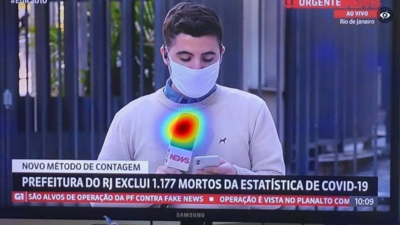

'--------------------------------------------------'

'Rank: 1 Val: 0.0018555367132648826'

'102730_eng'

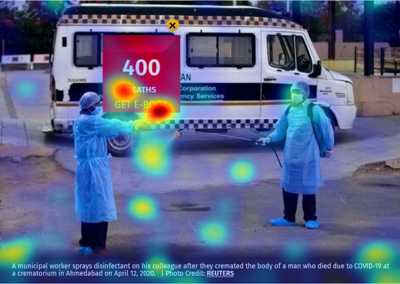

'--------------------------------------------------'

'Rank: 2 Val: 0.0012622319627553225'

'102141_2_eng'

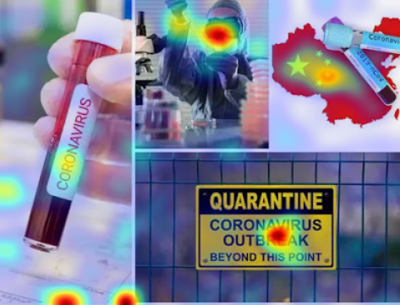

'--------------------------------------------------'

In [21]:
my_obj.show_results(
    search_query3[0], itm=True, image_gradcam_with_itm=image_gradcam_with_itm
)

## Save search results to csv

Convert the dictionary of dictionarys into a dictionary with lists:

In [22]:
df = mutils.get_dataframe(mydict)

Check the dataframe:

In [23]:
df.head(10)

filename  rank politician press conference  \
0  data/102141_2_eng.png                                 2   
1   data/106349S_por.png                                 0   
2    data/102730_eng.png                                 1   

   politician press conference  rank a world map  a world map  rank a dog  \
0                     0.113501                 1     0.106334           2   
1                     0.166554                 2     0.093529           0   
2                     0.144051                 0     0.131088           1   

      a dog  itm politician press conference  \
0  0.049040                         0.001262   
1  0.108629                         0.058296   
2  0.100833                         0.001856   

   itm_rank politician press conference  itm a world map  \
0                                     2         0.085763   
1                                     0         0.000794   
2                                     1         0.004548   

   itm_rank a world map  itm a dog  itm_rank a dog  
0                     0   0.000175               1  
1                     2   0.000091               2  
2                     1   0.000812               0

Write the csv file:

In [24]:
df.to_csv("data/data_out.csv")